# Business Understanding

**Problem**

a credit lending company has a number of creditors who defaulted as much as 4969 or 8% of the total creditors. The total loss incurred by the company as a result of the loan was $2,704,876,771.

**Business Metrics**
    
    1. Default loan creditors
    2. Amount credit from default loan

**Goals**

    1. Create a model that can scoring creditor

# Feature Engeneering

In [315]:
import warnings
warnings.filterwarnings("ignore")

## Merge and Concatenate Train Dataset, Installment and Prev app

In [316]:
import pandas as pd
import numpy as np

dfa = pd.read_csv('app_train.csv')
dfa

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,130325,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,...,-14268,-5813,-2313,-2709,FRIDAY,6,Electricity,0.295858,0.104877,0.616122
61499,294665,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,...,-21582,365243,-4106,-4191,TUESDAY,12,NA1,0.693816,0.411595,0.239226
61500,73002,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,...,-17729,-1564,-11844,-1263,FRIDAY,16,Industry: type 12,0.802154,0.714627,NaN
61501,184610,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,...,-11258,-4159,-5060,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694125,0.105473


In [317]:
dfc = pd.read_csv('installment_payment.csv')
dfc

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,5,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375
1,8,2723183,112102,14,-197.0,-197.0,70.740,70.740
2,11,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080
3,17,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450
4,18,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000
...,...,...,...,...,...,...,...,...
2872301,13605282,1024845,407119,5,-224.0,-230.0,24819.660,24819.660
2872302,13605286,2597827,448211,18,-44.0,-44.0,915.795,915.795
2872303,13605319,2003162,450999,16,-2135.0,-2113.0,5414.265,5384.880
2872304,13605341,2149043,415032,9,-425.0,-434.0,46517.490,46517.490


In [318]:
dfb = pd.read_csv('prev_app.csv')
dfb

,Unnamed: 0,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350707,1670100,1379569,309506,Cash loans,33389.100,1035000.0,1035000.0,NaN,1035000.0,THURSDAY,10,Refused,-156,60.0,low_normal,NaN,NaN,NaN,NaN
350708,1670115,1252861,363895,Cash loans,56754.000,1350000.0,1350000.0,NaN,1350000.0,THURSDAY,16,Refused,-847,48.0,middle,NaN,NaN,NaN,NaN
350709,1670139,1379406,302265,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,13,Canceled,-502,NaN,NA1,NaN,NaN,NaN,NaN
350710,1670160,2698899,161204,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,13,Canceled,-359,NaN,NA1,NaN,NaN,NaN,NaN


In [319]:
dfd = dfb.merge(dfc,how='left',on=['LN_ID','SK_ID_PREV'])
dfd

,Unnamed: 0_x,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,...,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Unnamed: 0_y,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,...,365243.0,-42.0,-37.0,0.0,6520759.0,1.0,-42.0,-42.0,17284.275,17284.275
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,365243.0,-482.0,-177.0,1.0,108784.0,8.0,-272.0,-281.0,47041.335,47041.335
2,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,365243.0,-482.0,-177.0,1.0,275973.0,7.0,-302.0,-305.0,47041.335,47041.335
3,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,365243.0,-482.0,-177.0,1.0,811980.0,11.0,-182.0,-197.0,92720.025,92720.025
4,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,365243.0,-482.0,-177.0,1.0,1505617.0,10.0,-212.0,-214.0,47041.335,47041.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769130,1670200,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,...,365243.0,-2409.0,-1716.0,1.0,10742173.0,18.0,-1899.0,-1902.0,7576.920,7576.920
2769131,1670200,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,...,365243.0,-2409.0,-1716.0,1.0,11095782.0,23.0,-1749.0,-1764.0,7576.920,7576.920
2769132,1670200,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,...,365243.0,-2409.0,-1716.0,1.0,11249474.0,16.0,-1959.0,-1972.0,7576.920,7576.920
2769133,1670200,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,...,365243.0,-2409.0,-1716.0,1.0,11298080.0,5.0,-2289.0,-2307.0,7576.920,7576.920


In [320]:
dfd.columns

Index(['Unnamed: 0_x', 'SK_ID_PREV', 'LN_ID', 'CONTRACT_TYPE', 'ANNUITY',
       'APPLICATION', 'APPROVED_CREDIT', 'AMT_DOWN_PAYMENT', 'PRICE',
       'WEEKDAYS_APPLY', 'HOUR_APPLY', 'CONTRACT_STATUS', 'DAYS_DECISION',
       'TERM_PAYMENT', 'YIELD_GROUP', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'Unnamed: 0_y', 'INST_NUMBER', 'INST_DAYS',
       'PAY_DAYS', 'AMT_INST', 'AMT_PAY'],
      dtype='object')

In [321]:
dfd.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1,inplace=True)

In [322]:
dfa.columns

Index(['Unnamed: 0', 'LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER',
       'NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE',
       'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY',
       'HOUR_APPLY', 'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2',
       'EXT_SCORE_3'],
      dtype='object')

In [323]:
dfe = dfa[['LN_ID','TARGET','GENDER','NUM_CHILDREN','INCOME',
    'INCOME_TYPE','EDUCATION','FAMILY_STATUS','HOUSING_TYPE','DAYS_AGE',
    'DAYS_WORK','DAYS_ID_CHANGE','ORGANIZATION_TYPE']]

In [324]:
df1 = dfd.merge(dfe,how='left',on='LN_ID')
df1

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,...,NUM_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_ID_CHANGE,ORGANIZATION_TYPE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,1.0,225000.0,State servant,Incomplete higher,Married,House / apartment,-14443.0,-7392.0,-4120.0,Military
1,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,0.0,315000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22163.0,365243.0,-2860.0,NA1
2,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,0.0,315000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22163.0,365243.0,-2860.0,NA1
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,0.0,315000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22163.0,365243.0,-2860.0,NA1
4,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,0.0,315000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22163.0,365243.0,-2860.0,NA1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769130,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2769131,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2769132,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2769133,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
df1 = df1.dropna()
df1

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,...,NUM_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_ID_CHANGE,ORGANIZATION_TYPE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,1.0,225000.0,State servant,Incomplete higher,Married,House / apartment,-14443.0,-7392.0,-4120.0,Military
46,1151694,161591,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12,...,0.0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1
47,1151694,161591,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12,...,0.0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1
48,1151694,161591,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12,...,0.0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1
49,1151694,161591,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12,...,0.0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227265,2561520,334654,Consumer loans,24851.025,248535.0,223681.5,24853.5,248535.0,FRIDAY,17,...,1.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-16338.0,-1757.0,-6059.0,Trade: type 3
2227267,2205099,157707,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10,...,0.0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-14656.0,-279.0,-534.0,Business Entity Type 3
2227268,2205099,157707,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10,...,0.0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-14656.0,-279.0,-534.0,Business Entity Type 3
2227269,2205099,157707,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10,...,0.0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-14656.0,-279.0,-534.0,Business Entity Type 3


In [326]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [327]:
numeric = df1.describe().columns.tolist()
df1[numeric]=clean_dataset(df1[numeric])

In [328]:
df1.isnull().sum()

SK_ID_PREV                   0
LN_ID                        0
CONTRACT_TYPE                0
ANNUITY                      0
APPLICATION                  0
APPROVED_CREDIT              0
AMT_DOWN_PAYMENT             0
PRICE                        0
WEEKDAYS_APPLY               0
HOUR_APPLY                   0
CONTRACT_STATUS              0
DAYS_DECISION                0
TERM_PAYMENT                 0
YIELD_GROUP                  0
FIRST_DRAW                   0
FIRST_DUE                    0
TERMINATION                  0
NFLAG_INSURED_ON_APPROVAL    0
INST_NUMBER                  0
INST_DAYS                    0
PAY_DAYS                     0
AMT_INST                     0
AMT_PAY                      0
TARGET                       0
GENDER                       0
NUM_CHILDREN                 0
INCOME                       0
INCOME_TYPE                  0
EDUCATION                    0
FAMILY_STATUS                0
HOUSING_TYPE                 0
DAYS_AGE                     0
DAYS_WOR

In [329]:
df1

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,...,NUM_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_ID_CHANGE,ORGANIZATION_TYPE
0,2030495.0,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,1.0,225000.0,State servant,Incomplete higher,Married,House / apartment,-14443.0,-7392.0,-4120.0,Military
46,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,0.0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1
47,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,0.0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1
48,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,0.0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1
49,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,0.0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227265,2561520.0,334654.0,Consumer loans,24851.025,248535.0,223681.5,24853.5,248535.0,FRIDAY,17.0,...,1.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-16338.0,-1757.0,-6059.0,Trade: type 3
2227267,2205099.0,157707.0,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10.0,...,0.0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-14656.0,-279.0,-534.0,Business Entity Type 3
2227268,2205099.0,157707.0,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10.0,...,0.0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-14656.0,-279.0,-534.0,Business Entity Type 3
2227269,2205099.0,157707.0,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10.0,...,0.0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-14656.0,-279.0,-534.0,Business Entity Type 3


# Feature Engineering

**CONTRACT TYPE**

In [330]:
df1['CONTRACT_TYPE'].unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans'], dtype=object)

In [331]:
consumer_loans = pd.read_csv('consumer_loans.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(consumer_loans,how='left',on='LN_ID')
df1.head(3)

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,...,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_ID_CHANGE,ORGANIZATION_TYPE,consumer_loans
0,2030495.0,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,225000.0,State servant,Incomplete higher,Married,House / apartment,-14443.0,-7392.0,-4120.0,Military,2.0
1,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1,5.0
2,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1,5.0


In [332]:
cash_loans = pd.read_csv('cash_loans.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(cash_loans,how='left',on='LN_ID')
df1.head(3)

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,...,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_ID_CHANGE,ORGANIZATION_TYPE,consumer_loans,cash_loans
0,2030495.0,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,State servant,Incomplete higher,Married,House / apartment,-14443.0,-7392.0,-4120.0,Military,2.0,NaN
1,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1,5.0,NaN
2,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,Pensioner,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1,5.0,NaN


In [333]:
revolving_loans = pd.read_csv('revolving_loans.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(revolving_loans,how='left',on='LN_ID')
df1.head(3)

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,...,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_ID_CHANGE,ORGANIZATION_TYPE,consumer_loans,cash_loans,revolving_loans
0,2030495.0,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,Incomplete higher,Married,House / apartment,-14443.0,-7392.0,-4120.0,Military,2.0,NaN,NaN
1,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1,5.0,NaN,NaN
2,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,Secondary / secondary special,Married,House / apartment,-22079.0,365243.0,-4964.0,NA1,5.0,NaN,NaN


In [334]:
df1 = df1.fillna(value=0)
df1.isnull().sum()

SK_ID_PREV                   0
LN_ID                        0
CONTRACT_TYPE                0
ANNUITY                      0
APPLICATION                  0
APPROVED_CREDIT              0
AMT_DOWN_PAYMENT             0
PRICE                        0
WEEKDAYS_APPLY               0
HOUR_APPLY                   0
CONTRACT_STATUS              0
DAYS_DECISION                0
TERM_PAYMENT                 0
YIELD_GROUP                  0
FIRST_DRAW                   0
FIRST_DUE                    0
TERMINATION                  0
NFLAG_INSURED_ON_APPROVAL    0
INST_NUMBER                  0
INST_DAYS                    0
PAY_DAYS                     0
AMT_INST                     0
AMT_PAY                      0
TARGET                       0
GENDER                       0
NUM_CHILDREN                 0
INCOME                       0
INCOME_TYPE                  0
EDUCATION                    0
FAMILY_STATUS                0
HOUSING_TYPE                 0
DAYS_AGE                     0
DAYS_WOR

**TERM PAYMENT**

Segmenting term payment :

    a. 0
    b. 1-12
    c. 12-23
    d. 23-36
    e >36

In [335]:
TERM_PAYMENT_0 = pd.read_csv('TERM_PAYMENT_0.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(TERM_PAYMENT_0,how='left',on='LN_ID')

In [336]:
TERM_PAYMENT_1_12 = pd.read_csv('TERM_PAYMENT_1_12.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(TERM_PAYMENT_1_12,how='left',on='LN_ID')

In [337]:
TERM_PAYMENT_12_24 = pd.read_csv('TERM_PAYMENT_12_24.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(TERM_PAYMENT_12_24,how='left',on='LN_ID')

In [338]:
TERM_PAYMENT_24_36 = pd.read_csv('TERM_PAYMENT_24_36.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(TERM_PAYMENT_24_36,how='left',on='LN_ID')

In [339]:
TERM_PAYMENT_36 = pd.read_csv('TERM_PAYMENT_36.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(TERM_PAYMENT_36,how='left',on='LN_ID')

In [340]:
df1 = df1.fillna(value=0)

**YIELD GROUP**

In [341]:
df1.groupby('LN_ID')['YIELD_GROUP'].unique()

LN_ID
100009.0    [low_action, high, middle, low_normal]
100039.0                                    [high]
100044.0                [low_normal, middle, high]
100045.0                        [high, low_normal]
100047.0                              [low_normal]
                             ...                  
456234.0                                    [high]
456247.0                        [low_normal, high]
456248.0                                    [high]
456252.0                              [low_normal]
456255.0                            [middle, high]
Name: YIELD_GROUP, Length: 54050, dtype: object

Creditor can have many YIELD_GROUP

In [342]:
low_group = pd.read_csv('low_group.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(low_group,how='left',on='LN_ID')

In [343]:
middle_group = pd.read_csv('middle_group.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(middle_group,how='left',on='LN_ID')

In [344]:
high_group = pd.read_csv('high_group.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(high_group,how='left',on='LN_ID')

In [345]:
df1 = df1.fillna(value=0)
df1

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,...,cash_loans,revolving_loans,term_payment_0,term_payment_1_12,term_payment_12_24,term_payment_24_36,term_payment_36,low_group,middle_group,high_group
0,2030495.0,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,0.0,0.0,0.0,2,2,2,0.0,0.0,2.0,0.0
1,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,0.0,0.0,0.0,5,5,5,0.0,1.0,4.0,0.0
2,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,0.0,0.0,0.0,5,5,5,0.0,1.0,4.0,0.0
3,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,0.0,0.0,0.0,5,5,5,0.0,1.0,4.0,0.0
4,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,0.0,0.0,0.0,5,5,5,0.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061779,2561520.0,334654.0,Consumer loans,24851.025,248535.0,223681.5,24853.5,248535.0,FRIDAY,17.0,...,0.0,0.0,0.0,2,2,2,0.0,2.0,0.0,0.0
1061780,2205099.0,157707.0,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10.0,...,0.0,0.0,0.0,5,5,5,0.0,0.0,3.0,2.0
1061781,2205099.0,157707.0,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10.0,...,0.0,0.0,0.0,5,5,5,0.0,0.0,3.0,2.0
1061782,2205099.0,157707.0,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10.0,...,0.0,0.0,0.0,5,5,5,0.0,0.0,3.0,2.0


**APPROVED CREDIT**

    1. High Approved credit
    2. Average Approved credit

In [346]:
df2 = df1.groupby(['LN_ID'])['APPROVED_CREDIT'].max().reset_index().rename(columns={'APPROVED_CREDIT':'HIGH APPROVED_CREDIT'})
df1 = df1.merge(df2,how='left',on='LN_ID')

In [347]:
df3 = df1.groupby(['LN_ID'])['APPROVED_CREDIT'].mean().reset_index().rename(columns={'APPROVED_CREDIT':'AVERAGE APPROVED_CREDIT'})
df1 = df1.merge(df3,how='left',on='LN_ID')

**INSURANCE**

In [348]:
df2 = df1.groupby('LN_ID')['NFLAG_INSURED_ON_APPROVAL'].sum().reset_index().rename(columns = {'NFLAG_INSURED_ON_APPROVAL':'HIGHEST INSURANCE'})
df1 = df1.merge(df2,how='left',on='LN_ID')

**INSTALLMENT**

In [349]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061784 entries, 0 to 1061783
Data columns (total 49 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1061784 non-null  float64
 1   LN_ID                      1061784 non-null  float64
 2   CONTRACT_TYPE              1061784 non-null  object 
 3   ANNUITY                    1061784 non-null  float64
 4   APPLICATION                1061784 non-null  float64
 5   APPROVED_CREDIT            1061784 non-null  float64
 6   AMT_DOWN_PAYMENT           1061784 non-null  float64
 7   PRICE                      1061784 non-null  float64
 8   WEEKDAYS_APPLY             1061784 non-null  object 
 9   HOUR_APPLY                 1061784 non-null  float64
 10  CONTRACT_STATUS            1061784 non-null  object 
 11  DAYS_DECISION              1061784 non-null  float64
 12  TERM_PAYMENT               1061784 non-null  float64
 13  YIELD_GROUP 

**INSTALLMENT PAY**

In [350]:
df2 = df1.groupby(['LN_ID'])['AMT_INST'].max().reset_index().rename(columns={'AMT_INST':'MAX_AMT_INST'})
df1 = df1.merge(df2,how='left',on='LN_ID')

In [351]:
df3 = df1.groupby(['LN_ID'])['AMT_INST'].mean().reset_index().rename(columns={'AMT_INST':'AVERAGE_AMT_INST'})
df1 = df1.merge(df3,how='left',on='LN_ID')

**INSTALLMENT PAY DAYS**

In [352]:
df1['INST_PAY_DAYS'] = df1['INST_DAYS']-df1['PAY_DAYS']
round(df1['INST_PAY_DAYS'].describe())

count    1061784.0
mean          12.0
std           26.0
min        -2444.0
25%            3.0
50%           10.0
75%           18.0
max         1256.0
Name: INST_PAY_DAYS, dtype: float64

In [353]:
df2 = df1.groupby(['LN_ID'])['INST_PAY_DAYS'].min().reset_index().rename(columns={'INST_PAY_DAYS':'MAX_INST_PAY_DAYS'})
df1 = df1.merge(df2,how='left',on='LN_ID')

In [354]:
df3 = df1.groupby(['LN_ID'])['INST_PAY_DAYS'].mean().reset_index().rename(columns={'INST_PAY_DAYS':'AVE_INST_PAY_DAYS'})
df1 = df1.merge(df3,how='left',on='LN_ID')

In [355]:
df1

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,...,middle_group,high_group,HIGH APPROVED_CREDIT,AVERAGE APPROVED_CREDIT,HIGHEST INSURANCE,MAX_AMT_INST,AVERAGE_AMT_INST,INST_PAY_DAYS,MAX_INST_PAY_DAYS,AVE_INST_PAY_DAYS
0,2030495.0,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,2.0,0.0,119848.5,102731.250000,0.0,74721.690,23612.587500,0.0,0.0,13.000000
1,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,4.0,0.0,209497.5,116398.852941,0.0,80296.110,19364.190882,3.0,1.0,7.911765
2,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,4.0,0.0,209497.5,116398.852941,0.0,80296.110,19364.190882,4.0,1.0,7.911765
3,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,4.0,0.0,209497.5,116398.852941,0.0,80296.110,19364.190882,8.0,1.0,7.911765
4,1151694.0,161591.0,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12.0,...,4.0,0.0,209497.5,116398.852941,0.0,80296.110,19364.190882,4.0,1.0,7.911765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061779,2561520.0,334654.0,Consumer loans,24851.025,248535.0,223681.5,24853.5,248535.0,FRIDAY,17.0,...,0.0,0.0,223681.5,200211.428571,0.0,24851.025,22125.859286,22.0,-12.0,47.904762
1061780,2205099.0,157707.0,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10.0,...,3.0,2.0,56106.0,30891.681818,2.0,39297.465,9695.305227,5.0,-34.0,2.500000
1061781,2205099.0,157707.0,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10.0,...,3.0,2.0,56106.0,30891.681818,2.0,39297.465,9695.305227,19.0,-34.0,2.500000
1061782,2205099.0,157707.0,Consumer loans,4334.355,22207.5,23854.5,0.0,22207.5,THURSDAY,10.0,...,3.0,2.0,56106.0,30891.681818,2.0,39297.465,9695.305227,10.0,-34.0,2.500000


**PAY AMOUNT**

    1.INST_PAY_AMOUNT <0.5
    2.INST_PAY_AMOUNT 0.5-7
    3.INST_PAY_AMOUNT 7-1
    4.INST_PAY_AMOUNT >=1

In [356]:
df1['INST_PAY_AMOUNT'] = df1['AMT_PAY']/df1['AMT_INST']

In [357]:
df2 = df1[df1['INST_PAY_AMOUNT']<0.5]
df2 = df2.groupby('LN_ID')['INST_PAY_AMOUNT'].count().reset_index().rename(columns={'INST_PAY_AMOUNT':'INST_PAY_AMOUNT <0.5'})
df1 = df1.merge(df2,how='left',on='LN_ID')

In [358]:
df3 = df1[(df1['INST_PAY_AMOUNT']>=0.5)|(df1['INST_PAY_AMOUNT']<0.7)]
df3 = df3.groupby('LN_ID')['INST_PAY_AMOUNT'].count().reset_index().rename(columns={'INST_PAY_AMOUNT':'INST_PAY_AMOUNT 0.5-7'})
df1 = df1.merge(df3,how='left',on='LN_ID')

In [359]:
df4 = df1[(df1['INST_PAY_AMOUNT']>=0.7)|(df1['INST_PAY_AMOUNT']<1)]
df4 = df4.groupby('LN_ID')['INST_PAY_AMOUNT'].count().reset_index().rename(columns={'INST_PAY_AMOUNT':'INST_PAY_AMOUNT 0.7-1'})
df1 = df1.merge(df4,how='left',on='LN_ID')

In [360]:
df1.loc[df1['INST_PAY_AMOUNT'] > 1, 'INST_PAY_AMOUNT'] = 1
df5 = df1[df1['INST_PAY_AMOUNT']>=1]
df5 = df5.groupby('LN_ID')['INST_PAY_AMOUNT'].count().reset_index().rename(columns={'INST_PAY_AMOUNT':'INST_PAY_AMOUNT >=1'})
df1 = df1.merge(df5,how='left',on='LN_ID')

In [361]:
df1 = df1.fillna(value=0)

In [362]:
numeric=df1.describe().columns
df1[numeric] = df1[numeric].astype(int)

In [363]:
df1.columns

Index(['SK_ID_PREV', 'LN_ID', 'CONTRACT_TYPE', 'ANNUITY', 'APPLICATION',
       'APPROVED_CREDIT', 'AMT_DOWN_PAYMENT', 'PRICE', 'WEEKDAYS_APPLY',
       'HOUR_APPLY', 'CONTRACT_STATUS', 'DAYS_DECISION', 'TERM_PAYMENT',
       'YIELD_GROUP', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS',
       'AMT_INST', 'AMT_PAY', 'TARGET', 'GENDER', 'NUM_CHILDREN', 'INCOME',
       'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_ID_CHANGE', 'ORGANIZATION_TYPE', 'consumer_loans',
       'cash_loans', 'revolving_loans', 'term_payment_0', 'term_payment_1_12',
       'term_payment_12_24', 'term_payment_24_36', 'term_payment_36',
       'low_group', 'middle_group', 'high_group', 'HIGH APPROVED_CREDIT',
       'AVERAGE APPROVED_CREDIT', 'HIGHEST INSURANCE', 'MAX_AMT_INST',
       'AVERAGE_AMT_INST', 'INST_PAY_DAYS', 'MAX_INST_PAY_DAYS',
       'AVE_INST_PAY_DAYS', 'INST_PAY_AMOUNT', 'I

In [364]:
df_cek = df1[['LN_ID','SK_ID_PREV','TERM_PAYMENT','term_payment_1_12']]
df_cek[(df_cek['LN_ID']==334654)&(df_cek['TERM_PAYMENT']<12)]

,LN_ID,SK_ID_PREV,TERM_PAYMENT,term_payment_1_12
634067,334654,2464074,10,2
634068,334654,2464074,10,2
634069,334654,2464074,10,2
634070,334654,2464074,10,2
634071,334654,2464074,10,2
634072,334654,2464074,10,2
634073,334654,2464074,10,2
634074,334654,2464074,10,2
634075,334654,2464074,10,2
634076,334654,2464074,10,2


# Import Train Dataset

In [365]:
df_train = pd.read_csv('app_train.csv')
df_train.head(3)

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022


In [366]:
selected_column = ['LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN', 'INCOME',
                  'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE', 'DAYS_WORK',
                  'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY', 'ORGANIZATION_TYPE']

In [367]:
df_train = df_train[selected_column]
df_train

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE
0,333538,0,Revolving loans,F,1,67500.0,Working,Secondary / secondary special,Married,With parents,-11539,-921,-2757,TUESDAY,18,Business Entity Type 3
1,406644,0,Cash loans,F,1,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-4482,-2455,TUESDAY,14,Other
2,259130,0,Cash loans,F,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20775,365243,-4312,THURSDAY,14,NA1
3,411997,0,Cash loans,M,0,225000.0,State servant,Higher education,Married,House / apartment,-20659,-10455,-4010,WEDNESDAY,10,Culture
4,241559,0,Revolving loans,M,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,-1644,SUNDAY,11,Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,0,Cash loans,M,2,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-14268,-5813,-2709,FRIDAY,6,Electricity
61499,441376,1,Cash loans,F,0,441000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21582,365243,-4191,TUESDAY,12,NA1
61500,184648,0,Revolving loans,F,0,202500.0,Commercial associate,Higher education,Married,House / apartment,-17729,-1564,-1263,FRIDAY,16,Industry: type 12
61501,313981,0,Cash loans,F,0,94500.0,Working,Secondary / secondary special,Married,House / apartment,-11258,-4159,-3698,FRIDAY,15,Business Entity Type 3


In [368]:
df_train['AGE'] = -df_train['DAYS_AGE']/365
df_train['WORK'] = -df_train['DAYS_WORK']/365
df_train['ID_CHANGE'] = -df_train['DAYS_ID_CHANGE']/365
df_train.drop(['DAYS_AGE','DAYS_WORK','DAYS_ID_CHANGE'],axis=1,inplace=True)

In [369]:
df1.columns

Index(['SK_ID_PREV', 'LN_ID', 'CONTRACT_TYPE', 'ANNUITY', 'APPLICATION',
       'APPROVED_CREDIT', 'AMT_DOWN_PAYMENT', 'PRICE', 'WEEKDAYS_APPLY',
       'HOUR_APPLY', 'CONTRACT_STATUS', 'DAYS_DECISION', 'TERM_PAYMENT',
       'YIELD_GROUP', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS',
       'AMT_INST', 'AMT_PAY', 'TARGET', 'GENDER', 'NUM_CHILDREN', 'INCOME',
       'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_ID_CHANGE', 'ORGANIZATION_TYPE', 'consumer_loans',
       'cash_loans', 'revolving_loans', 'term_payment_0', 'term_payment_1_12',
       'term_payment_12_24', 'term_payment_24_36', 'term_payment_36',
       'low_group', 'middle_group', 'high_group', 'HIGH APPROVED_CREDIT',
       'AVERAGE APPROVED_CREDIT', 'HIGHEST INSURANCE', 'MAX_AMT_INST',
       'AVERAGE_AMT_INST', 'INST_PAY_DAYS', 'MAX_INST_PAY_DAYS',
       'AVE_INST_PAY_DAYS', 'INST_PAY_AMOUNT', 'I

In [370]:
df2 = df1[['LN_ID','consumer_loans', 'cash_loans', 'revolving_loans', 'term_payment_0', 'term_payment_1_12', 'term_payment_12_24', 'term_payment_24_36', 'term_payment_36', 'low_group', 'middle_group', 'high_group', 'HIGH APPROVED_CREDIT', 'AVERAGE APPROVED_CREDIT', 'HIGHEST INSURANCE', 'MAX_AMT_INST', 'AVERAGE_AMT_INST', 'INST_PAY_DAYS', 'MAX_INST_PAY_DAYS', 'AVE_INST_PAY_DAYS', 'INST_PAY_AMOUNT', 'INST_PAY_AMOUNT <0.5', 'INST_PAY_AMOUNT 0.5-7', 'INST_PAY_AMOUNT 0.7-1', 'INST_PAY_AMOUNT >=1']]
df2 = df2.drop_duplicates(subset='LN_ID')
df2

,LN_ID,consumer_loans,cash_loans,revolving_loans,term_payment_0,term_payment_1_12,term_payment_12_24,term_payment_24_36,term_payment_36,low_group,...,MAX_AMT_INST,AVERAGE_AMT_INST,INST_PAY_DAYS,MAX_INST_PAY_DAYS,AVE_INST_PAY_DAYS,INST_PAY_AMOUNT,INST_PAY_AMOUNT <0.5,INST_PAY_AMOUNT 0.5-7,INST_PAY_AMOUNT 0.7-1,INST_PAY_AMOUNT >=1
0,271877,2,0,0,0,2,2,2,0,0,...,74721,23612,0,0,13,1,0,6,6,6
1,161591,5,0,0,0,5,5,5,0,1,...,80296,19364,3,1,7,1,0,34,34,34
7,304455,1,0,0,0,1,1,1,0,0,...,15542,15541,16,-8,11,1,2,12,12,8
19,447421,5,0,0,0,5,5,5,0,0,...,104907,29828,8,4,20,1,0,16,16,16
23,427532,1,0,0,0,1,1,1,0,1,...,104559,16591,9,4,9,1,0,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061514,289593,1,0,0,0,1,1,1,0,1,...,3600,3299,26,-43,2,1,4,17,17,9
1061572,145949,1,0,0,0,1,1,1,0,1,...,10345,10344,14,1,8,1,0,10,10,10
1061614,135300,1,0,0,0,1,1,1,0,1,...,4390,4390,45,7,26,1,0,8,8,8
1061622,269453,1,0,0,0,1,1,1,0,0,...,4667,4667,16,9,13,1,0,4,4,4


In [371]:
df_train_new = df_train.merge(df2,how='left',on='LN_ID')

In [372]:
numeric = df_train_new.describe().columns.tolist()

In [373]:
df_train_new[numeric]=clean_dataset(df_train_new[numeric])

In [374]:
df_train_new = df_train_new.dropna()

In [375]:
df_train_new[numeric]=df_train_new[numeric].astype(int)

In [376]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54050 entries, 0 to 61502
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LN_ID                    54050 non-null  int32 
 1   TARGET                   54050 non-null  int32 
 2   CONTRACT_TYPE            54050 non-null  object
 3   GENDER                   54050 non-null  object
 4   NUM_CHILDREN             54050 non-null  int32 
 5   INCOME                   54050 non-null  int32 
 6   INCOME_TYPE              54050 non-null  object
 7   EDUCATION                54050 non-null  object
 8   FAMILY_STATUS            54050 non-null  object
 9   HOUSING_TYPE             54050 non-null  object
 10  WEEKDAYS_APPLY           54050 non-null  object
 11  HOUR_APPLY               54050 non-null  int32 
 12  ORGANIZATION_TYPE        54050 non-null  object
 13  AGE                      54050 non-null  int32 
 14  WORK                     54050 non-nul

In [377]:
df_train_new.to_excel('train_transform.xlsx')

## Preparation Test Dataset

In [378]:
df_test = pd.read_csv('app_test.csv')
dfc = pd.read_csv('installment_payment.csv')
dfb = pd.read_csv('prev_app.csv')

In [379]:
dfb = dfb[dfb['CONTRACT_STATUS']=='Approved']
dfd = dfb.merge(dfc,how='left',on=['LN_ID','SK_ID_PREV'])
dfd

,Unnamed: 0_x,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,...,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,Unnamed: 0_y,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,...,365243.0,-42.0,-37.0,0.0,6520759.0,1.0,-42.0,-42.0,17284.275,17284.275
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,365243.0,-482.0,-177.0,1.0,108784.0,8.0,-272.0,-281.0,47041.335,47041.335
2,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,365243.0,-482.0,-177.0,1.0,275973.0,7.0,-302.0,-305.0,47041.335,47041.335
3,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,365243.0,-482.0,-177.0,1.0,811980.0,11.0,-182.0,-197.0,92720.025,92720.025
4,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,...,365243.0,-482.0,-177.0,1.0,1505617.0,10.0,-212.0,-214.0,47041.335,47041.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638105,1670200,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,...,365243.0,-2409.0,-1716.0,1.0,10742173.0,18.0,-1899.0,-1902.0,7576.920,7576.920
2638106,1670200,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,...,365243.0,-2409.0,-1716.0,1.0,11095782.0,23.0,-1749.0,-1764.0,7576.920,7576.920
2638107,1670200,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,...,365243.0,-2409.0,-1716.0,1.0,11249474.0,16.0,-1959.0,-1972.0,7576.920,7576.920
2638108,1670200,1024416,331038,Cash loans,7576.920,99000.0,112068.0,0.0,99000.0,FRIDAY,...,365243.0,-2409.0,-1716.0,1.0,11298080.0,5.0,-2289.0,-2307.0,7576.920,7576.920


In [380]:
dfe = df_test[['LN_ID','TARGET','GENDER','NUM_CHILDREN','INCOME',
    'INCOME_TYPE','EDUCATION','FAMILY_STATUS','HOUSING_TYPE','DAYS_AGE',
    'DAYS_WORK','DAYS_ID_CHANGE','ORGANIZATION_TYPE']]

In [381]:
df1 = dfd.merge(dfe,how='left',on='LN_ID')

In [382]:
df1 = df1.dropna()
numeric = df1.describe().columns.tolist()
df1[numeric]=clean_dataset(df1[numeric])

In [383]:
df1.drop(['Unnamed: 0_y','Unnamed: 0_x'],axis=1,inplace=True)

In [384]:
df1.to_csv('test_transform.csv',index=False)

## Feature Engineering for Test Dataset

In [385]:
consumer_loans = pd.read_csv('consumer_loans_test.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(consumer_loans,how='left',on='LN_ID')

In [386]:
cash_loans = pd.read_csv('cash_loans_test.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(cash_loans,how='left',on='LN_ID')

In [387]:
revolving_loans = pd.read_csv('revolving_loans_test.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(revolving_loans,how='left',on='LN_ID')

In [388]:
df1 = df1.fillna(value=0)
df1.isnull().sum()

SK_ID_PREV                   0
LN_ID                        0
CONTRACT_TYPE                0
ANNUITY                      0
APPLICATION                  0
APPROVED_CREDIT              0
AMT_DOWN_PAYMENT             0
PRICE                        0
WEEKDAYS_APPLY               0
HOUR_APPLY                   0
CONTRACT_STATUS              0
DAYS_DECISION                0
TERM_PAYMENT                 0
YIELD_GROUP                  0
FIRST_DRAW                   0
FIRST_DUE                    0
TERMINATION                  0
NFLAG_INSURED_ON_APPROVAL    0
INST_NUMBER                  0
INST_DAYS                    0
PAY_DAYS                     0
AMT_INST                     0
AMT_PAY                      0
TARGET                       0
GENDER                       0
NUM_CHILDREN                 0
INCOME                       0
INCOME_TYPE                  0
EDUCATION                    0
FAMILY_STATUS                0
HOUSING_TYPE                 0
DAYS_AGE                     0
DAYS_WOR

In [389]:
TERM_PAYMENT_0 = pd.read_csv('TERM_PAYMENT_0_TEST.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(TERM_PAYMENT_0,how='left',on='LN_ID')

In [390]:
TERM_PAYMENT_1_12 = pd.read_csv('TERM_PAYMENT_1_12_TEST.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(TERM_PAYMENT_1_12,how='left',on='LN_ID')

In [391]:
TERM_PAYMENT_12_24 = pd.read_csv('TERM_PAYMENT_12_24_TEST.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(TERM_PAYMENT_12_24,how='left',on='LN_ID')

In [392]:
TERM_PAYMENT_24_36 = pd.read_csv('TERM_PAYMENT_24_36_TEST.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(TERM_PAYMENT_24_36,how='left',on='LN_ID')

In [393]:
TERM_PAYMENT_36 = pd.read_csv('TERM_PAYMENT_36_TEST.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(TERM_PAYMENT_36,how='left',on='LN_ID')

In [394]:
df1 = df1.fillna(value=0)

In [395]:
low_group = pd.read_csv('low_group_test.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(low_group,how='left',on='LN_ID')

In [396]:
middle_group = pd.read_csv('middle_group_test.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(middle_group,how='left',on='LN_ID')

In [397]:
high_group = pd.read_csv('high_group_test.csv').rename(columns={'ln_id':'LN_ID'})
df1= df1.merge(high_group,how='left',on='LN_ID')

In [398]:
df1 = df1.fillna(value=0)

In [399]:
df2 = df1.groupby(['LN_ID'])['APPROVED_CREDIT'].max().reset_index().rename(columns={'APPROVED_CREDIT':'HIGH APPROVED_CREDIT'})
df1 = df1.merge(df2,how='left',on='LN_ID')
df3 = df1.groupby(['LN_ID'])['APPROVED_CREDIT'].mean().reset_index().rename(columns={'APPROVED_CREDIT':'AVERAGE APPROVED_CREDIT'})
df1 = df1.merge(df3,how='left',on='LN_ID')
df2 = df1.groupby('LN_ID')['NFLAG_INSURED_ON_APPROVAL'].sum().reset_index().rename(columns = {'NFLAG_INSURED_ON_APPROVAL':'HIGHEST INSURANCE'})
df1 = df1.merge(df2,how='left',on='LN_ID')

In [400]:
df2 = df1.groupby(['LN_ID'])['AMT_INST'].max().reset_index().rename(columns={'AMT_INST':'MAX_AMT_INST'})
df1 = df1.merge(df2,how='left',on='LN_ID')
df3 = df1.groupby(['LN_ID'])['AMT_INST'].mean().reset_index().rename(columns={'AMT_INST':'AVERAGE_AMT_INST'})
df1 = df1.merge(df3,how='left',on='LN_ID')
df1['INST_PAY_DAYS'] = df1['INST_DAYS']-df1['PAY_DAYS']
df2 = df1.groupby(['LN_ID'])['INST_PAY_DAYS'].min().reset_index().rename(columns={'INST_PAY_DAYS':'MAX_INST_PAY_DAYS'})
df1 = df1.merge(df2,how='left',on='LN_ID')
df3 = df1.groupby(['LN_ID'])['INST_PAY_DAYS'].mean().reset_index().rename(columns={'INST_PAY_DAYS':'AVE_INST_PAY_DAYS'})
df1 = df1.merge(df3,how='left',on='LN_ID')

In [401]:
df1['INST_PAY_AMOUNT'] = df1['AMT_PAY']/df1['AMT_INST']

In [402]:
df2 = df1[df1['INST_PAY_AMOUNT']<0.5]
df2 = df2.groupby('LN_ID')['INST_PAY_AMOUNT'].count().reset_index().rename(columns={'INST_PAY_AMOUNT':'INST_PAY_AMOUNT <0.5'})
df1 = df1.merge(df2,how='left',on='LN_ID')

In [403]:
df3 = df1[(df1['INST_PAY_AMOUNT']>=0.5)|(df1['INST_PAY_AMOUNT']<0.7)]
df3 = df3.groupby('LN_ID')['INST_PAY_AMOUNT'].count().reset_index().rename(columns={'INST_PAY_AMOUNT':'INST_PAY_AMOUNT 0.5-7'})
df1 = df1.merge(df3,how='left',on='LN_ID')

In [404]:
df4 = df1[(df1['INST_PAY_AMOUNT']>=0.7)|(df1['INST_PAY_AMOUNT']<1)]
df4 = df4.groupby('LN_ID')['INST_PAY_AMOUNT'].count().reset_index().rename(columns={'INST_PAY_AMOUNT':'INST_PAY_AMOUNT 0.7-1'})
df1 = df1.merge(df4,how='left',on='LN_ID')

In [405]:
df1.loc[df1['INST_PAY_AMOUNT'] > 1, 'INST_PAY_AMOUNT'] = 1
df5 = df1[df1['INST_PAY_AMOUNT']>=1]
df5 = df5.groupby('LN_ID')['INST_PAY_AMOUNT'].count().reset_index().rename(columns={'INST_PAY_AMOUNT':'INST_PAY_AMOUNT >=1'})
df1 = df1.merge(df5,how='left',on='LN_ID')

In [406]:
df1 = df1.fillna(value=0)

In [407]:
numeric=df1.describe().columns
df1[numeric] = df1[numeric].astype(int)

## Merge with Test Dataset

In [408]:
selected_column = ['LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN', 'INCOME',
                  'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE', 'DAYS_WORK',
                  'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY', 'ORGANIZATION_TYPE']

In [409]:
df_test = df_test[selected_column]
df_test

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE
0,219092,0,Cash loans,M,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-17598,-2650,-1131,SATURDAY,7,Business Entity Type 3
1,141577,0,Cash loans,F,0,144000.0,Working,Higher education,Married,Office apartment,-14097,-7408,-4872,MONDAY,14,Kindergarten
2,180205,0,Cash loans,F,1,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18384,-2826,-1930,SATURDAY,12,Self-employed
3,357381,0,Cash loans,M,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12170,-926,-4048,THURSDAY,13,Other
4,271229,0,Cash loans,M,0,216000.0,Working,Incomplete higher,Married,House / apartment,-10790,-577,-2035,MONDAY,14,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,144293,0,Cash loans,F,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-12866,-3154,-4395,TUESDAY,10,Government
14757,272093,1,Cash loans,F,1,135000.0,Working,Secondary / secondary special,Civil marriage,With parents,-11421,-3962,-3795,SATURDAY,7,Self-employed
14758,251117,0,Cash loans,F,0,157500.0,State servant,Higher education,Separated,House / apartment,-13313,-2258,-4515,MONDAY,12,Other
14759,334313,0,Cash loans,F,0,216000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-24085,365243,-4740,THURSDAY,15,NA1


In [410]:
df_test['AGE'] = -df_test['DAYS_AGE']/365

df_test['WORK'] = -df_test['DAYS_WORK']/365

df_test['ID_CHANGE'] = -df_test['DAYS_ID_CHANGE']/365

df_test.drop(['DAYS_AGE','DAYS_WORK','DAYS_ID_CHANGE'],axis=1,inplace=True)

In [411]:
df2 = df1[['LN_ID','consumer_loans', 'cash_loans', 'revolving_loans', 'term_payment_0', 'term_payment_1_12', 'term_payment_12_24', 'term_payment_24_36', 'term_payment_36', 'low_group', 'middle_group', 'high_group', 'HIGH APPROVED_CREDIT', 'AVERAGE APPROVED_CREDIT', 'HIGHEST INSURANCE', 'MAX_AMT_INST', 'AVERAGE_AMT_INST', 'INST_PAY_DAYS', 'MAX_INST_PAY_DAYS', 'AVE_INST_PAY_DAYS', 'INST_PAY_AMOUNT', 'INST_PAY_AMOUNT <0.5', 'INST_PAY_AMOUNT 0.5-7', 'INST_PAY_AMOUNT 0.7-1', 'INST_PAY_AMOUNT >=1']]
df2 = df2.drop_duplicates(subset='LN_ID')

In [412]:
df_test_new = df_test.merge(df2,how='left',on='LN_ID')

In [413]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14761 entries, 0 to 14760
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LN_ID                    14761 non-null  int64  
 1   TARGET                   14761 non-null  int64  
 2   CONTRACT_TYPE            14761 non-null  object 
 3   GENDER                   14761 non-null  object 
 4   NUM_CHILDREN             14761 non-null  int64  
 5   INCOME                   14761 non-null  float64
 6   INCOME_TYPE              14761 non-null  object 
 7   EDUCATION                14761 non-null  object 
 8   FAMILY_STATUS            14761 non-null  object 
 9   HOUSING_TYPE             14761 non-null  object 
 10  WEEKDAYS_APPLY           14761 non-null  object 
 11  HOUR_APPLY               14761 non-null  int64  
 12  ORGANIZATION_TYPE        14761 non-null  object 
 13  AGE                      14761 non-null  float64
 14  WORK                  

In [414]:
numeric = df_test_new.describe().columns.tolist()

In [415]:
df_test_new = df_test_new.dropna()

In [416]:
df_test_new[numeric]=df_test_new[numeric].astype(int)

In [417]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13008 entries, 0 to 14760
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LN_ID                    13008 non-null  int32 
 1   TARGET                   13008 non-null  int32 
 2   CONTRACT_TYPE            13008 non-null  object
 3   GENDER                   13008 non-null  object
 4   NUM_CHILDREN             13008 non-null  int32 
 5   INCOME                   13008 non-null  int32 
 6   INCOME_TYPE              13008 non-null  object
 7   EDUCATION                13008 non-null  object
 8   FAMILY_STATUS            13008 non-null  object
 9   HOUSING_TYPE             13008 non-null  object
 10  WEEKDAYS_APPLY           13008 non-null  object
 11  HOUR_APPLY               13008 non-null  int32 
 12  ORGANIZATION_TYPE        13008 non-null  object
 13  AGE                      13008 non-null  int32 
 14  WORK                     13008 non-nul

In [418]:
df_train_new = df_train_new.drop('LN_ID',axis=1)
df_test_new  = df_test_new.drop('LN_ID',axis=1)

In [419]:
df_train_new.to_csv('train_transform.csv')
df_test_new.to_csv('test_transform.csv')

# Modelling

In [420]:
df_train = df_train_new
df_test  = df_test_new
import warnings
warnings.filterwarnings("ignore")

In [421]:
df_train

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,WEEKDAYS_APPLY,...,MAX_AMT_INST,AVERAGE_AMT_INST,INST_PAY_DAYS,MAX_INST_PAY_DAYS,AVE_INST_PAY_DAYS,INST_PAY_AMOUNT,INST_PAY_AMOUNT <0.5,INST_PAY_AMOUNT 0.5-7,INST_PAY_AMOUNT 0.7-1,INST_PAY_AMOUNT >=1
0,0,Revolving loans,F,1,67500,Working,Secondary / secondary special,Married,With parents,TUESDAY,...,5378,5378,17,13,14,1,0,4,4,4
1,0,Cash loans,F,1,202500,Commercial associate,Secondary / secondary special,Married,House / apartment,TUESDAY,...,59225,17421,-5,-35,2,0,15,36,36,9
2,0,Cash loans,F,0,180000,Pensioner,Secondary / secondary special,Married,House / apartment,THURSDAY,...,6130,6126,7,3,7,1,0,12,12,12
3,0,Cash loans,M,0,225000,State servant,Higher education,Married,House / apartment,WEDNESDAY,...,15737,12793,2,0,4,1,0,24,24,24
4,0,Revolving loans,M,0,135000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,SUNDAY,...,27888,10297,0,-5,5,1,3,18,18,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61496,0,Cash loans,F,0,180000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,...,4877,2788,9,6,11,1,0,11,11,11
61497,0,Cash loans,F,2,58500,Working,Secondary / secondary special,Married,House / apartment,THURSDAY,...,6224,3548,11,11,17,1,0,7,7,7
61498,0,Cash loans,M,2,360000,State servant,Secondary / secondary special,Married,House / apartment,FRIDAY,...,138152,17948,9,2,8,1,0,21,21,21
61501,0,Cash loans,F,0,94500,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,...,5027,4511,0,0,10,1,0,14,14,14


In [422]:
df_test

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,WEEKDAYS_APPLY,...,MAX_AMT_INST,AVERAGE_AMT_INST,INST_PAY_DAYS,MAX_INST_PAY_DAYS,AVE_INST_PAY_DAYS,INST_PAY_AMOUNT,INST_PAY_AMOUNT <0.5,INST_PAY_AMOUNT 0.5-7,INST_PAY_AMOUNT 0.7-1,INST_PAY_AMOUNT >=1
0,0,Cash loans,M,3,135000,Working,Secondary / secondary special,Married,House / apartment,SATURDAY,...,119403,12189,4,-4,12,1,1,22,22,20
1,0,Cash loans,F,0,144000,Working,Higher education,Married,Office apartment,MONDAY,...,25746,25739,-22,-22,6,0,1,9,9,7
2,0,Cash loans,F,1,90000,Working,Secondary / secondary special,Married,House / apartment,SATURDAY,...,7745,7733,14,6,11,1,0,12,12,12
3,0,Cash loans,M,2,112500,Working,Secondary / secondary special,Married,House / apartment,THURSDAY,...,6244,3388,2,-15,7,1,2,13,13,9
4,0,Cash loans,M,0,216000,Working,Incomplete higher,Married,House / apartment,MONDAY,...,72850,18858,22,0,9,1,0,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,0,Cash loans,F,1,67500,Working,Secondary / secondary special,Married,House / apartment,TUESDAY,...,22143,3802,14,2,20,1,0,34,34,34
14757,1,Cash loans,F,1,135000,Working,Secondary / secondary special,Civil marriage,With parents,SATURDAY,...,21013,12265,10,2,8,1,0,16,16,16
14758,0,Cash loans,F,0,157500,State servant,Higher education,Separated,House / apartment,MONDAY,...,49920,14493,-20,-37,10,1,15,59,59,34
14759,0,Cash loans,F,0,216000,Pensioner,Secondary / secondary special,Widow,House / apartment,THURSDAY,...,8670,8114,1,1,8,1,0,20,20,20


## Feature Selection

### WOE and IV

In [423]:
features = df_train.drop(['TARGET'],axis=1)
labels = df_train['TARGET']

In [424]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [425]:
final_iv, IV = data_vars(features,labels)

In [426]:
df_train_new['TARGET'].value_counts()

0    49725
1     4325
Name: TARGET, dtype: int64

In [427]:
final_iv.sort_values('IV',ascending=False)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
101,AGE,21,28,6638,797.0,0.120066,5841.0,0.879934,0.184277,0.117466,0.450293,1.114685e-01
109,AGE,61,69,5228,229.0,0.043803,4999.0,0.956197,0.052948,0.100533,-0.641175,1.114685e-01
108,AGE,56,60,5717,309.0,0.054049,5408.0,0.945951,0.071445,0.108758,-0.420198,1.114685e-01
107,AGE,50,55,7063,406.0,0.057483,6657.0,0.942517,0.093873,0.133876,-0.354975,1.114685e-01
106,AGE,46,49,4906,363.0,0.073991,4543.0,0.926009,0.083931,0.091362,-0.084844,1.114685e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
4,NUM_CHILDREN,0,1,48508,3855.0,0.079471,44653.0,0.920529,0.891329,0.897999,-0.007455,4.721529e-04
142,high_group,2,14,8871,679.0,0.076542,8192.0,0.923458,0.156994,0.164746,-0.048197,4.452264e-04
141,high_group,0,1,45179,3646.0,0.080701,41533.0,0.919299,0.843006,0.835254,0.009238,4.452264e-04
136,term_payment_36,2,2,2,0.0,0.000000,2.0,1.000000,0.000000,0.000040,0.000000,1.617779e-09


In [428]:
IV = IV.rename(columns={'VAR_NAME':'index'})
round((IV.sort_values(['IV'],ascending=0)),2)

,index,IV
0,AGE,0.11
24,ORGANIZATION_TYPE,0.10
14,INCOME_TYPE,0.07
5,EDUCATION,0.06
7,GENDER,0.05
2,AVERAGE_AMT_INST,0.05
12,ID_CHANGE,0.04
8,HIGH APPROVED_CREDIT,0.04
21,MAX_AMT_INST,0.04
1,AVERAGE APPROVED_CREDIT,0.03


In [429]:
final_iv.to_csv("woe.csv")

### Transform to WOE

In [430]:
transform_vars_list = df_train
transform_prefix = ''

In [431]:
transform_vars_list

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,WEEKDAYS_APPLY,...,MAX_AMT_INST,AVERAGE_AMT_INST,INST_PAY_DAYS,MAX_INST_PAY_DAYS,AVE_INST_PAY_DAYS,INST_PAY_AMOUNT,INST_PAY_AMOUNT <0.5,INST_PAY_AMOUNT 0.5-7,INST_PAY_AMOUNT 0.7-1,INST_PAY_AMOUNT >=1
0,0,Revolving loans,F,1,67500,Working,Secondary / secondary special,Married,With parents,TUESDAY,...,5378,5378,17,13,14,1,0,4,4,4
1,0,Cash loans,F,1,202500,Commercial associate,Secondary / secondary special,Married,House / apartment,TUESDAY,...,59225,17421,-5,-35,2,0,15,36,36,9
2,0,Cash loans,F,0,180000,Pensioner,Secondary / secondary special,Married,House / apartment,THURSDAY,...,6130,6126,7,3,7,1,0,12,12,12
3,0,Cash loans,M,0,225000,State servant,Higher education,Married,House / apartment,WEDNESDAY,...,15737,12793,2,0,4,1,0,24,24,24
4,0,Revolving loans,M,0,135000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,SUNDAY,...,27888,10297,0,-5,5,1,3,18,18,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61496,0,Cash loans,F,0,180000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,...,4877,2788,9,6,11,1,0,11,11,11
61497,0,Cash loans,F,2,58500,Working,Secondary / secondary special,Married,House / apartment,THURSDAY,...,6224,3548,11,11,17,1,0,7,7,7
61498,0,Cash loans,M,2,360000,State servant,Secondary / secondary special,Married,House / apartment,FRIDAY,...,138152,17948,9,2,8,1,0,21,21,21
61501,0,Cash loans,F,0,94500,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,...,5027,4511,0,0,10,1,0,14,14,14


In [432]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            df_train[transform_prefix + var] = df_train[var].apply(lambda x: eval(replace_cmd))
            df_test[transform_prefix + var] = df_test[var].apply(lambda x: eval(replace_cmd))
        except:
            df_train[transform_prefix + var] = df_train[var].apply(lambda x: eval(replace_cmd1))
            df_test[transform_prefix + var] = df_test[var].apply(lambda x: eval(replace_cmd1))

In [433]:
df_train

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,WEEKDAYS_APPLY,...,MAX_AMT_INST,AVERAGE_AMT_INST,INST_PAY_DAYS,MAX_INST_PAY_DAYS,AVE_INST_PAY_DAYS,INST_PAY_AMOUNT,INST_PAY_AMOUNT <0.5,INST_PAY_AMOUNT 0.5-7,INST_PAY_AMOUNT 0.7-1,INST_PAY_AMOUNT >=1
0,0,-0.388353,-0.174288,-0.007455,0.044018,0.196929,0.112151,-0.104883,0.351195,0.115222,...,0.281097,0.195541,-0.039238,-0.110135,-0.051588,-0.033456,-0.065829,0.109199,0.109199,0.190015
1,0,0.033012,-0.174288,-0.007455,0.032286,-0.056604,0.112151,-0.104883,-0.035790,0.115222,...,-0.196803,-0.140033,0.036142,0.089441,0.130069,0.356156,0.237205,-0.191127,-0.191127,0.111171
2,0,0.033012,-0.174288,-0.007455,0.032286,-0.523516,0.112151,-0.104883,-0.035790,0.004094,...,0.281097,0.195541,0.036142,-0.110135,0.130069,-0.033456,-0.065829,0.079022,0.079022,0.111171
3,0,0.033012,0.285134,-0.007455,-0.143247,-0.367253,-0.477070,-0.104883,-0.035790,-0.003146,...,0.016681,-0.139556,0.036142,0.089441,0.130069,-0.033456,-0.065829,-0.024703,-0.024703,-0.275149
4,0,-0.388353,0.285134,-0.007455,0.038454,-0.056604,0.112151,0.269254,-0.035790,-0.063815,...,-0.162663,-0.023887,0.036142,0.089441,0.130069,-0.033456,0.237205,-0.024703,-0.024703,0.111171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61496,0,0.033012,-0.174288,-0.007455,0.032286,-0.056604,0.112151,0.269254,-0.035790,-0.003146,...,0.281097,0.353468,0.036142,-0.110135,-0.026613,-0.033456,-0.065829,0.079022,0.079022,0.111171
61497,0,0.033012,-0.174288,0.063338,0.044018,0.196929,0.112151,-0.104883,-0.035790,0.004094,...,0.281097,0.353468,0.036142,-0.110135,-0.051588,-0.033456,-0.065829,0.109199,0.109199,0.190015
61498,0,0.033012,0.285134,0.063338,-0.143247,-0.367253,0.112151,-0.104883,-0.035790,-0.002688,...,-0.196803,-0.140033,0.036142,-0.110135,-0.026613,-0.033456,-0.065829,-0.024703,-0.024703,-0.085222
61501,0,0.033012,-0.174288,-0.007455,0.044018,0.196929,0.112151,-0.104883,-0.035790,-0.002688,...,0.281097,0.353468,0.036142,0.089441,-0.026613,-0.033456,-0.065829,0.079022,0.079022,-0.085222


In [434]:
df_test

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,WEEKDAYS_APPLY,...,MAX_AMT_INST,AVERAGE_AMT_INST,INST_PAY_DAYS,MAX_INST_PAY_DAYS,AVE_INST_PAY_DAYS,INST_PAY_AMOUNT,INST_PAY_AMOUNT <0.5,INST_PAY_AMOUNT 0.5-7,INST_PAY_AMOUNT 0.7-1,INST_PAY_AMOUNT >=1
0,0,0.033012,0.285134,0.063338,0.038454,0.196929,0.112151,-0.104883,-0.035790,-0.046381,...,-0.196803,-0.139556,0.036142,0.089441,-0.051588,-0.033456,-0.065829,-0.024703,-0.024703,-0.085222
1,0,0.033012,-0.174288,-0.007455,0.038454,0.196929,-0.477070,-0.104883,-0.450496,-0.078538,...,-0.162663,-0.403409,0.036142,0.089441,0.130069,0.356156,-0.065829,0.109199,0.109199,0.190015
2,0,0.033012,-0.174288,-0.007455,0.044018,0.196929,0.112151,-0.104883,-0.035790,-0.046381,...,0.281097,0.024665,-0.039238,-0.110135,-0.026613,-0.033456,-0.065829,0.079022,0.079022,0.111171
3,0,0.033012,0.285134,0.063338,0.044018,0.196929,0.112151,-0.104883,-0.035790,0.004094,...,0.281097,0.353468,0.036142,0.089441,0.130069,-0.033456,0.237205,0.079022,0.079022,0.111171
4,0,0.033012,0.285134,-0.007455,-0.143247,0.196929,0.001537,-0.104883,-0.035790,-0.078538,...,-0.196803,-0.140033,-0.039238,0.089441,-0.026613,-0.033456,-0.065829,-0.024703,-0.024703,-0.085222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,0,0.033012,-0.174288,-0.007455,0.044018,0.196929,0.112151,-0.104883,-0.035790,0.115222,...,-0.162663,0.353468,-0.039238,-0.110135,-0.089778,-0.033456,-0.065829,-0.191127,-0.191127,-0.275149
14757,1,0.033012,-0.174288,-0.007455,0.038454,0.196929,0.112151,0.312134,0.351195,-0.046381,...,-0.162663,-0.139556,0.036142,-0.110135,-0.026613,-0.033456,-0.065829,-0.024703,-0.024703,-0.085222
14758,0,0.033012,-0.174288,-0.007455,0.032286,-0.367253,-0.477070,-0.059650,-0.035790,-0.078538,...,-0.196803,-0.139556,0.036142,0.089441,-0.026613,-0.033456,0.237205,-0.191127,-0.191127,-0.275149
14759,0,0.033012,-0.174288,-0.007455,-0.143247,-0.523516,0.112151,-0.192164,-0.035790,0.004094,...,0.281097,0.024665,0.036142,-0.110135,-0.026613,-0.033456,-0.065829,-0.024703,-0.024703,-0.085222


### Checking Multicollinearity

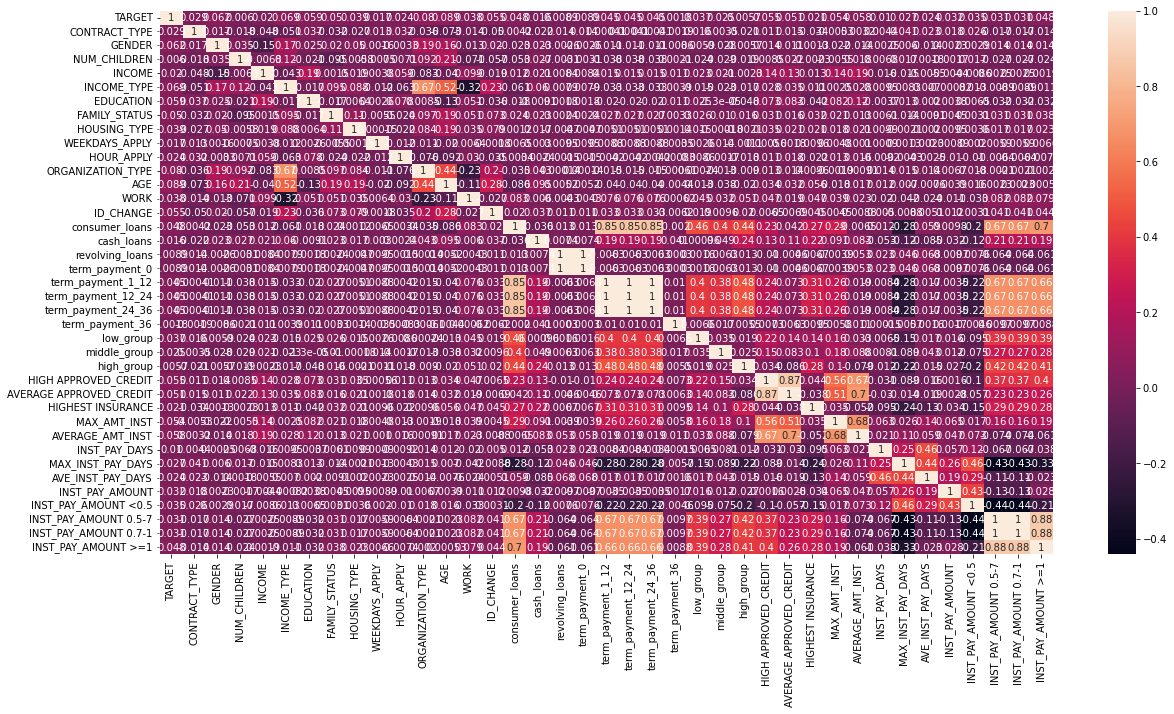

In [435]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df_train.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_corr, annot=True)
plt.show()

**Data Insight**

    1. Some features have multicollinearity with each other
    2. Features with low IV can be dropped to reduce multicollinearity

In [436]:
df_train = df_train.drop(['term_payment_1_12','term_payment_12_24','term_payment_24_36','INST_PAY_AMOUNT 0.5-7',
                                 'INST_PAY_AMOUNT 0.7-1','INST_PAY_AMOUNT >=1','AVERAGE APPROVED_CREDIT'],axis=1)

### Exploratory Data Analysis

<AxesSubplot:ylabel='TARGET'>

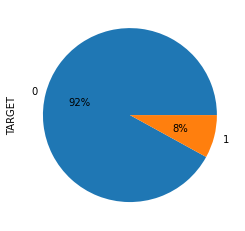

In [437]:
df_train_new['TARGET'].value_counts().plot(kind='pie',autopct='%1.0f%%')

**Data Insight**:
    
    1. target default represented by 1
    2. 8% is default creditors

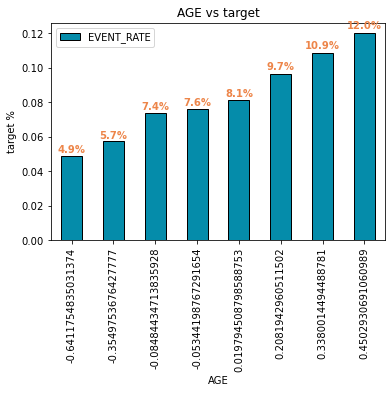

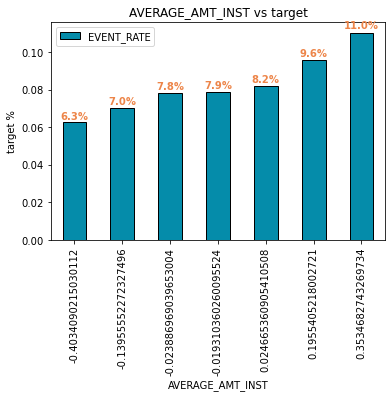

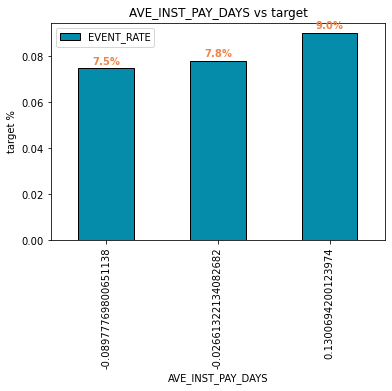

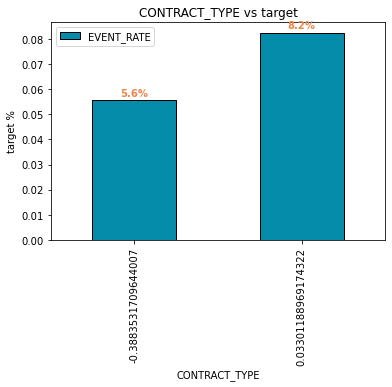

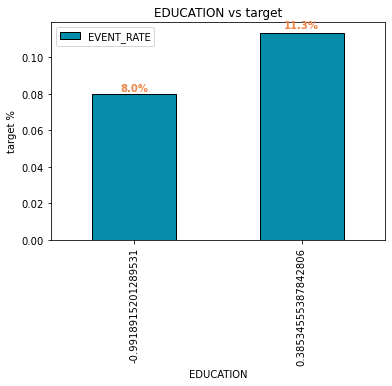

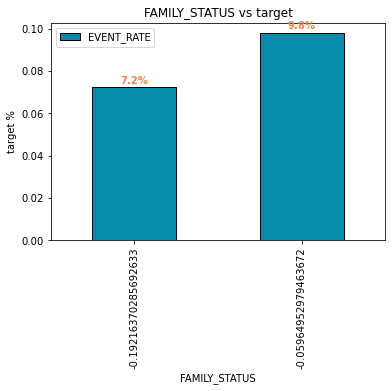

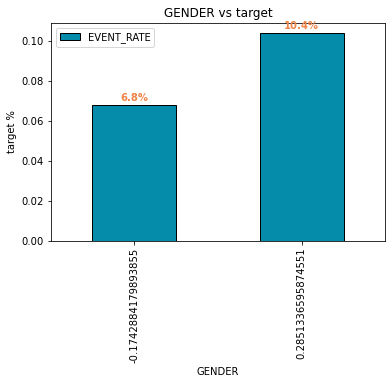

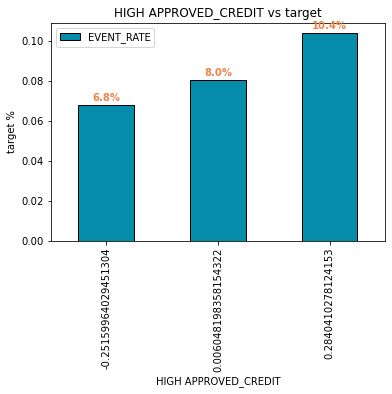

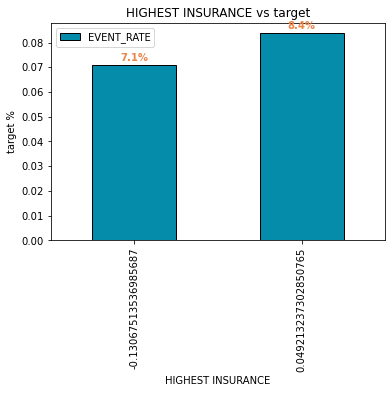

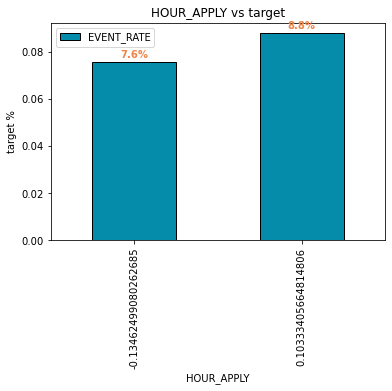

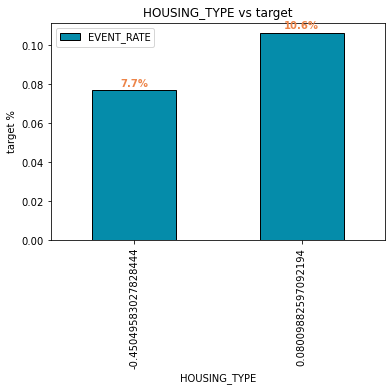

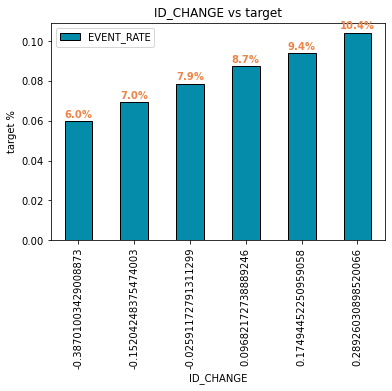

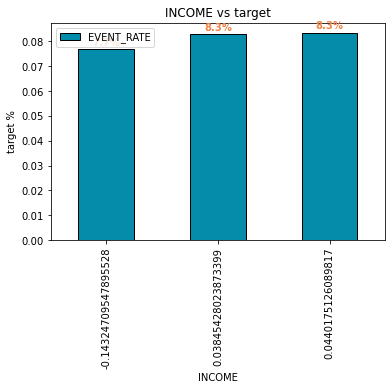

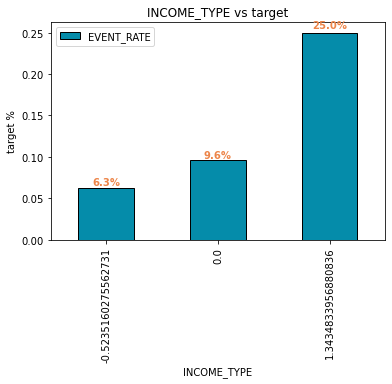

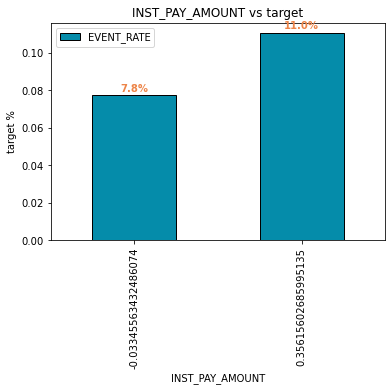

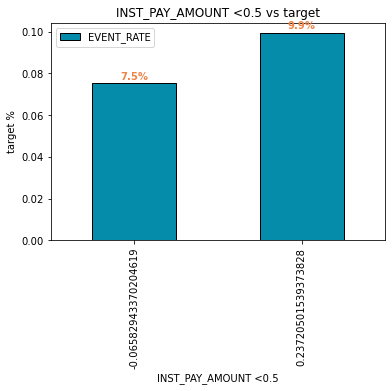

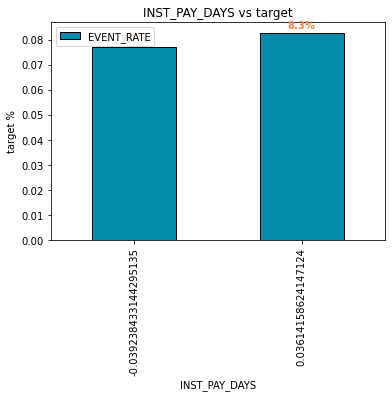

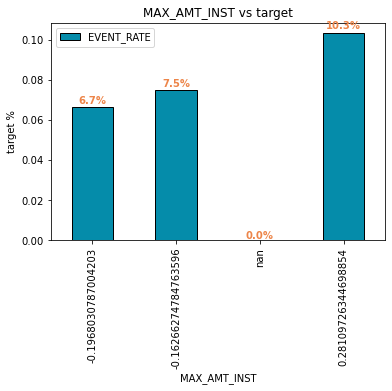

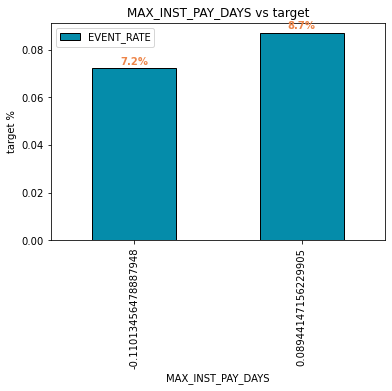

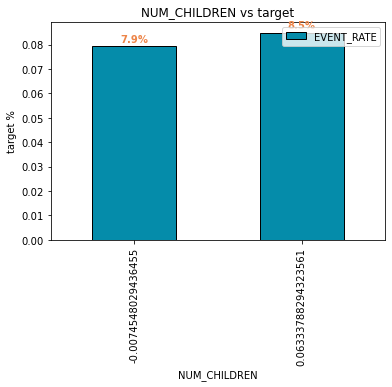

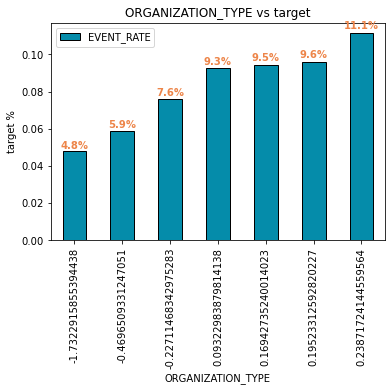

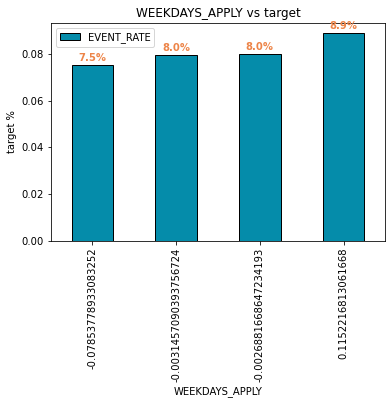

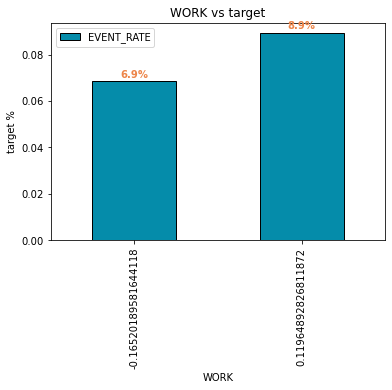

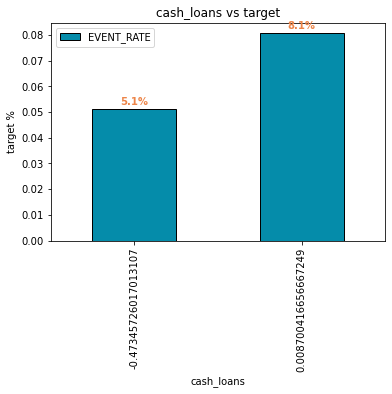

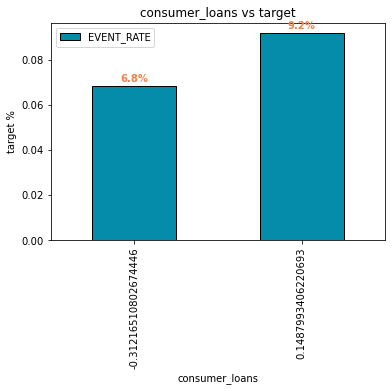

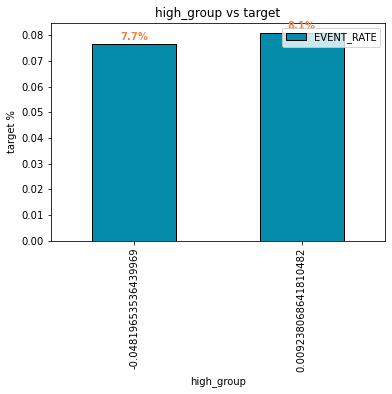

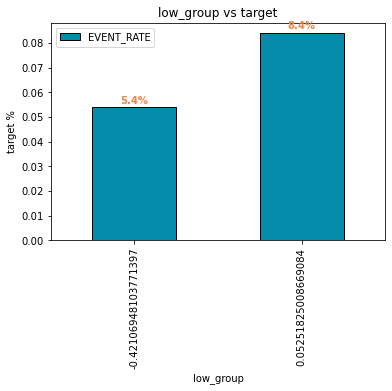

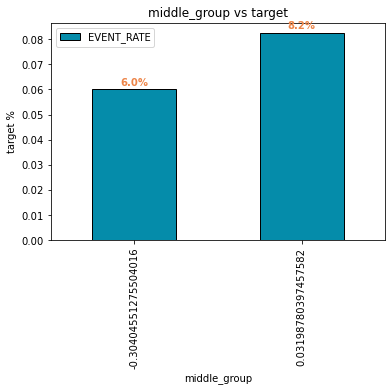

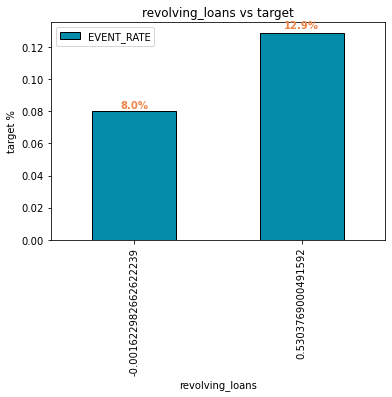

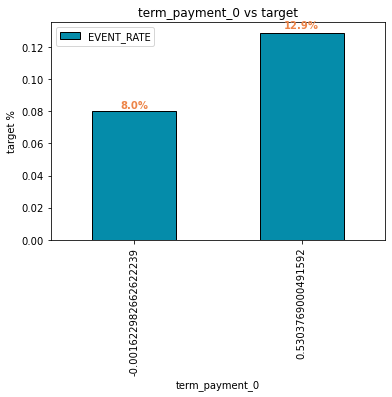

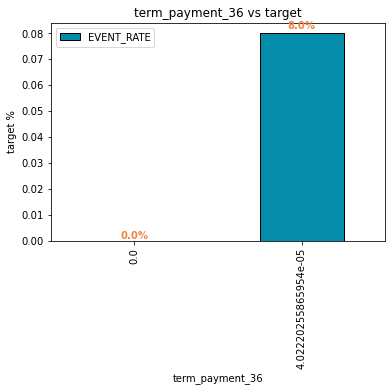

In [438]:
bar_color = '#058caa'
num_color = '#ed8549'

final_iv,_ = data_vars(df_train,df_train['TARGET'])
final_iv = final_iv[(final_iv.VAR_NAME != 'target')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('target'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('target') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

**Data Insight**

    1. AGE, ORGANIZATION_TYPE and INCOME_TYPE are feature important based on IV value 

### Model Testing

In [439]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [440]:
df_train_new = pd.read_csv('train_transform.csv')
df_train_new = df_train_new.drop('Unnamed: 0',axis=1)
df_test_new = pd.read_csv('test_transform.csv')
df_test_new = df_test_new.drop('Unnamed: 0',axis=1)

In [441]:
def preprocessing(df):
    """"
    Objective :
    Function for preprocessing data, known missing, duplicated values and basic stastics every column in dataframe and duplicated row
    df is dataframe
    """
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null(%)','Number of Duplicated','Type','Values'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum()/df.shape[0]*100,df[var].duplicated(keep=False).sum(),df[var].dtypes,df[var].unique()]
        return (variables.set_index('Variable'))
    except:
        print('ada kesalahan penginputan')

In [442]:
preprocessing(df_train_new)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
TARGET,2,0.0,54050,int64,"[0, 1]"
CONTRACT_TYPE,2,0.0,54050,object,"[Revolving loans, Cash loans]"
GENDER,2,0.0,54050,object,"[F, M]"
NUM_CHILDREN,10,0.0,54048,int64,"[1, 0, 2, 3, 6, 5, 4, 8, 7, 9]"
INCOME,628,0.0,53723,int64,"[67500, 202500, 180000, 225000, 135000, 90000,..."
INCOME_TYPE,6,0.0,54049,object,"[Working, Commercial associate, Pensioner, Sta..."
EDUCATION,5,0.0,54050,object,"[Secondary / secondary special, Higher educati..."
FAMILY_STATUS,5,0.0,54050,object,"[Married, Single / not married, Civil marriage..."
HOUSING_TYPE,6,0.0,54050,object,"[With parents, House / apartment, Municipal ap..."


**Data Insight**

    1. ORGANIZATION_TYPE have high cardinality and can be separated by bins based on IV value
    2. WEEKDAYS_APPLY can simplified to weekday and weekend

In [443]:
final_iv,IV = data_vars(df_train_new.drop('TARGET',axis=1),df_train_new['TARGET'])

In [444]:
organize_type= final_iv[final_iv['VAR_NAME']=='ORGANIZATION_TYPE'].sort_values(['EVENT_RATE'])
organize_type.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
array= np.array(organize_type['EVENT_RATE'])
bins=[0.04,0.05,0.06,0.07,0.08,0.09,0.09,0.10,0.12,0.21]
bin_indices  = np.digitize(array, bins)
bin_indices = list(bin_indices)
organize_type['bins']= bin_indices
organize_type['bins'].unique()
organize_type['bins'] = organize_type['bins'].replace({0:'CAT_0',1:'CAT_1',2:'CAT_2',3:'CAT_3',
                                                      4:'CAT_4',5:'CAT_5',6:'CAT_6',7:'CAT_7',
                                                      8:'CAT_8',9:'CAT_9',10:'CAT_10'})
organize_type['ORGANIZATION_TYPE']=organize_type['MIN_VALUE']
df_train_new = df_train_new.merge(organize_type[['ORGANIZATION_TYPE','bins']],how='left',on='ORGANIZATION_TYPE')
df_train_new = df_train_new.drop(['ORGANIZATION_TYPE'],axis=1)
df_train_new['bins'].unique()

array(['CAT_7', 'CAT_5', 'CAT_1', 'CAT_8', 'CAT_4', 'CAT_9', 'CAT_3',
       'CAT_2', 'CAT_10', 'CAT_0'], dtype=object)

In [445]:
organize_type= final_iv[final_iv['VAR_NAME']=='ORGANIZATION_TYPE'].sort_values(['EVENT_RATE'])
organize_type.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
array= np.array(organize_type['EVENT_RATE'])
bins=[0.04,0.05,0.06,0.07,0.08,0.09,0.09,0.10,0.12,0.21]
bin_indices  = np.digitize(array, bins)
bin_indices = list(bin_indices)
organize_type['bins']= bin_indices
organize_type['bins'].unique()
organize_type['bins'] = organize_type['bins'].replace({0:'CAT_0',1:'CAT_1',2:'CAT_2',3:'CAT_3',
                                                      4:'CAT_4',5:'CAT_5',6:'CAT_6',7:'CAT_7',
                                                      8:'CAT_8',9:'CAT_9',10:'CAT_10'})
organize_type['ORGANIZATION_TYPE']=organize_type['MIN_VALUE']
df_test_new = df_test_new.merge(organize_type[['ORGANIZATION_TYPE','bins']],how='left',on='ORGANIZATION_TYPE')
df_test_new = df_test_new.drop(['ORGANIZATION_TYPE'],axis=1)
df_test_new['bins'].unique()

array(['CAT_7', 'CAT_4', 'CAT_5', 'CAT_8', 'CAT_1', 'CAT_3', 'CAT_2',
       'CAT_9', 'CAT_0', 'CAT_10'], dtype=object)

In [446]:
df_train_new['WEEKDAYS_APPLY']=df_train_new['WEEKDAYS_APPLY'].replace(['SUNDAY','SATURDAY'],'WEEKEND')
df_train_new['WEEKDAYS_APPLY']=df_train_new['WEEKDAYS_APPLY'].replace(['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY'],'WEEKDAY')
df_train_new['WEEKDAYS_APPLY'].unique()

array(['WEEKDAY', 'WEEKEND'], dtype=object)

In [447]:
df_test_new['WEEKDAYS_APPLY']=df_test_new['WEEKDAYS_APPLY'].replace(['SUNDAY','SATURDAY'],'WEEKEND')
df_test_new['WEEKDAYS_APPLY']=df_test_new['WEEKDAYS_APPLY'].replace(['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY'],'WEEKDAY')
df_test_new['WEEKDAYS_APPLY'].unique()

array(['WEEKEND', 'WEEKDAY'], dtype=object)

In [448]:
df_test_new.to_csv('model_test.csv')
df_train_new.to_csv('model_train.csv')

In [449]:
final_iv,IV = data_vars(df_train_new.drop('TARGET',axis=1),df_train_new['TARGET'])

In [450]:
round(IV.sort_values('IV',ascending=False),2)

,VAR_NAME,IV
0,AGE,0.11
26,bins,0.09
14,INCOME_TYPE,0.07
5,EDUCATION,0.06
7,GENDER,0.05
2,AVERAGE_AMT_INST,0.05
12,ID_CHANGE,0.04
8,HIGH APPROVED_CREDIT,0.04
21,MAX_AMT_INST,0.04
1,AVERAGE APPROVED_CREDIT,0.03


In [451]:
transform_vars_list = df_train_new
transform_prefix = ''

### WOE

In [452]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            df_train_new[transform_prefix + var] = df_train_new[var].apply(lambda x: eval(replace_cmd))
            df_test_new[transform_prefix + var] = df_test_new[var].apply(lambda x: eval(replace_cmd))
        except:
            df_train_new[transform_prefix + var] = df_train_new[var].apply(lambda x: eval(replace_cmd1))
            df_test_new[transform_prefix + var] = df_test_new[var].apply(lambda x: eval(replace_cmd1))

In [453]:
from sklearn.preprocessing import RobustScaler
scaller = RobustScaler ()
features_train = df_train_new.drop('TARGET',axis=1)
label_train = df_train_new['TARGET']
features_test = df_test_new.drop('TARGET',axis=1)
features_train = features_train.rename(columns={'INST_PAY_AMOUNT <0.5':'INST_PAY_AMOUNT_0.5'})
features_test = features_test.rename(columns={'INST_PAY_AMOUNT <0.5':'INST_PAY_AMOUNT_0.5'})
label_test = df_test_new['TARGET']
features_train = scaller.fit_transform(features_train,)
features_test = scaller.transform(features_test)

### Logistic Regression

In [454]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_lr_WOE = accuracy_score(pred_train,label_train)
accuracy_test_lr_WOE = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr_WOE = precision_score(pred_train,label_train)
precision_test_lr_WOE = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr_WOE = recall_score(pred_train,label_train)
recall_test_lr_WOE = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr_WOE = f1_score(pred_train,label_train)
f1_test_lr_WOE = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr_WOE = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr_WOE = metrics.auc(fpr,tpr)

overfitting_lr_WOE = auc_train_lr_WOE-auc_test_lr_WOE

print(accuracy_train_lr_WOE,accuracy_test_lr_WOE,auc_train_lr_WOE,auc_test_lr_WOE)

0.919981498612396 0.9186654366543665 0.6796494662842164 0.662767912932746


### XGBoost

In [455]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb_WOE = accuracy_score(pred_train,label_train)
accuracy_test_xgb_WOE = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb_WOE = precision_score(pred_train,label_train)
precision_test_xgb_WOE = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb_WOE = recall_score(pred_train,label_train)
recall_test_xgb_WOE = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb_WOE = f1_score(pred_train,label_train)
f1_test_xgb_WOE = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb_WOE = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb_WOE = metrics.auc(fpr,tpr)


overfitting_xgb_WOE = auc_train_xgb_WOE-auc_test_xgb_WOE


fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb_one_hot_encoding = metrics.auc(fpr,tpr)
print(accuracy_train_xgb_WOE,accuracy_test_xgb_WOE,auc_train_xgb_WOE,auc_test_xgb_WOE)

0.9254764107308048 0.9177429274292743 0.8974688788335847 0.6322888769368271


### One Hot Encoding

In [456]:
df_train_one = pd.read_csv('model_train.csv')
df_test_one = pd.read_csv('model_test.csv')

In [457]:
features_train = df_train_one.drop('TARGET',axis=1)
label_train = df_train_one['TARGET']
features_test = df_test_one.drop('TARGET',axis=1)
label_test = df_test_one['TARGET']

In [458]:
def one_hot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [459]:
nominal = ['CONTRACT_TYPE','FAMILY_STATUS','HOUSING_TYPE','INCOME_TYPE','WEEKDAYS_APPLY','EDUCATION','GENDER','bins']

In [460]:
features_train = features_train.rename(columns={'INST_PAY_AMOUNT <0.5':'INST_PAY_AMOUNT_0.5'})
features_test = features_test.rename(columns={'INST_PAY_AMOUNT <0.5':'INST_PAY_AMOUNT_0.5'})
features_train = one_hot_encode(features_train,nominal)
features_test = one_hot_encode(features_test,nominal)

In [461]:
features_train = features_train.drop(['Student', 'Unemployed'],axis=1)
features_train = scaller.fit_transform(features_train,)
features_test = scaller.transform(features_test)

model training don't have student and unemployed

### Logistic Regression

In [462]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_lr_ONE = accuracy_score(pred_train,label_train)
accuracy_test_lr_ONE = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr_ONE = precision_score(pred_train,label_train)
precision_test_lr_ONE = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr_ONE = recall_score(pred_train,label_train)
recall_test_lr_ONE = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr_ONE = f1_score(pred_train,label_train)
f1_test_lr_ONE = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr_ONE = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr_ONE = metrics.auc(fpr,tpr)

overfitting_lr_ONE = auc_train_lr_ONE-auc_test_lr_ONE

print(accuracy_train_lr_ONE,accuracy_test_lr_ONE,auc_train_lr_ONE,auc_test_lr_ONE)

0.919981498612396 0.9186654366543665 0.6747011639159888 0.6530624609470778


### XGBoost

In [463]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb_ONE = accuracy_score(pred_train,label_train)
accuracy_test_xgb_ONE = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb_ONE = precision_score(pred_train,label_train)
precision_test_xgb_ONE = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb_ONE = recall_score(pred_train,label_train)
recall_test_xgb_ONE = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb_ONE = f1_score(pred_train,label_train)
f1_test_xgb_ONE = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb_ONE = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb_ONE = metrics.auc(fpr,tpr)


overfitting_xgb_ONE = auc_train_xgb_ONE-auc_test_xgb_ONE

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb_one_hot_encoding = metrics.auc(fpr,tpr)
print(accuracy_train_xgb_ONE,accuracy_test_xgb_ONE,auc_train_xgb_ONE,auc_test_xgb_ONE)

0.9292876965772433 0.918050430504305 0.9214780529908717 0.6325706511852315


In [464]:
model_performance = pd.DataFrame({'Model':['Linear Regression One Hot','XGBoost One Hot','Linear Regression WOE','XGBoost WOE'],
                          'AUC':list(np.array([auc_test_lr_ONE,auc_test_xgb_ONE,auc_test_lr_WOE,auc_test_xgb_WOE])*100),
                                  'Overfitting':(list(np.array([overfitting_lr_ONE,overfitting_xgb_ONE,overfitting_lr_WOE,overfitting_xgb_WOE])*100))
                                  
                          })
model_performance

,Model,AUC,Overfitting
0,Linear Regression One Hot,65.306246,2.163870
1,XGBoost One Hot,63.257065,28.890740
2,Linear Regression WOE,66.276791,1.688155
3,XGBoost WOE,63.228888,26.518000


**Data Insight**

Linear regression with WOE encoding has higher AUC and no indicate overfitting

### Performance Tuning

In [556]:
features_train = df_train_new.drop('TARGET',axis=1)
label_train = df_train_new['TARGET']
features_test = df_test_new.drop('TARGET',axis=1)
label_test = df_test_new['TARGET']
features_train = scaller.fit_transform(features_train)
features_test = scaller.transform(features_test)

In [557]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_lr_WOE = accuracy_score(pred_train,label_train)
accuracy_test_lr_WOE = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr_WOE = precision_score(pred_train,label_train)
precision_test_lr_WOE = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr_WOE = recall_score(pred_train,label_train)
recall_test_lr_WOE = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr_WOE = f1_score(pred_train,label_train)
f1_test_lr_WOE = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr_WOE = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr_WOE = metrics.auc(fpr,tpr)

overfitting_lr_WOE = auc_train_lr_WOE-auc_test_lr_WOE

print(accuracy_train_lr_WOE,accuracy_test_lr_WOE,auc_train_lr_WOE,auc_test_lr_WOE)

0.919981498612396 0.9186654366543665 0.6796494662842164 0.662767912932746


AUC test from based model is 0.6626

In [467]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### RandomCV for different solver

In [468]:
from sklearn.model_selection import RandomizedSearchCV

#List Hyperparameters 
penalty = [None,'l1', 'l2','elasticnet']
C = 100, 10, 1.0, 0.1, 0.01
solver = ['lbfs','sag','saga','newton-cg','liblinear']
max_iter = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C,solver=solver,max_iter=max_iter)
#GridSearchCV
logreg = LogisticRegression()
clf = RandomizedSearchCV(logreg, hyperparameters, cv=10,n_jobs=-1,scoring='roc_auc')
#Fitting Model
random_model = clf.fit(features_train,label_train)
#Prediksi menggunakan model baru
pred_train = random_model.predict(features_train)
pred_test = random_model.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_lr_HT = accuracy_score(pred_train,label_train)
accuracy_test_lr_HT = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr_HT = precision_score(pred_train,label_train)
precision_test_lr_HT = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr_HT = recall_score(pred_train,label_train)
recall_test_lr_HT = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr_HT = f1_score(pred_train,label_train)
f1_test_lr_HT = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr_HT = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr_HT = metrics.auc(fpr,tpr)

overfitting_lr_HT = auc_train_lr_HT-auc_test_lr_HT

print(auc_train_lr_HT,auc_test_lr_HT)

0.6802498179292468 0.6623950613378048


In [469]:
random_model.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 300, 'C': 10}

### GridCV for newton-cg

In [470]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters 
penalty = ['l2']
C = [1]
solver = ['newton-cg']
max_iter = [int(x) for x in np.linspace(start = 100, stop = 100, num = 5)]
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C,solver=solver,max_iter=max_iter)
#GridSearchCV
logreg = LogisticRegression()
clf = GridSearchCV(logreg, hyperparameters, cv=10,n_jobs=-1,scoring='roc_auc')
#Fitting Model
grid_model = clf.fit(features_train,label_train)
#Prediksi menggunakan model baru
pred_train = grid_model.predict(features_train)
pred_test = grid_model.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_lr_G = accuracy_score(pred_train,label_train)
accuracy_test_lr_G = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr_G = precision_score(pred_train,label_train)
precision_test_lr_G = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr_G = recall_score(pred_train,label_train)
recall_test_lr_G = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr_G = f1_score(pred_train,label_train)
f1_test_lr_G = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr_G = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr_G = metrics.auc(fpr,tpr)

overfitting_lr_G = auc_train_lr_G-auc_test_lr_G

print(auc_train_lr_G,auc_test_lr_G)

0.6801237558014165 0.662496776898071


In [471]:
grid_model.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [472]:
model_performance = pd.DataFrame({'Model':['Linear Regression Base Model','Linear Regression Random CV Tuning Parameter','Linear Regression Grid CV Tuning Parameter'],
                          'AUC':list(np.array([auc_test_lr_WOE,auc_test_lr_HT,auc_test_lr_G])*100),
                                  'Overfitting':(list(np.array([overfitting_lr_WOE,overfitting_lr_HT,overfitting_lr_G])*100))
                                  
                          })
model_performance

,Model,AUC,Overfitting
0,Linear Regression Base Model,66.276791,1.688155
1,Linear Regression Random CV Tuning Parameter,66.239506,1.785476
2,Linear Regression Grid CV Tuning Parameter,66.249678,1.762698


base model is better than hypertunning model

# Final Model

In [560]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_lr_WOE = accuracy_score(label_train,pred_train)
accuracy_test_lr_WOE = accuracy_score(label_test,pred_test)

from sklearn.metrics import precision_score
precision_train_lr_WOE = precision_score(label_train,pred_train)
precision_test_lr_WOE = precision_score(label_test,pred_test)

from sklearn.metrics import recall_score
recall_train_lr_WOE = recall_score(label_train,pred_train)
recall_test_lr_WOE = recall_score(label_test,pred_test)

from sklearn.metrics import f1_score
f1_train_lr_WOE = f1_score(label_train,pred_train)
f1_test_lr_WOE = f1_score(label_test,pred_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr_WOE = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr_WOE = metrics.auc(fpr,tpr)

overfitting_lr_WOE = auc_train_lr_WOE-auc_test_lr_WOE

print(accuracy_train_lr_WOE,accuracy_test_lr_WOE,auc_train_lr_WOE,auc_test_lr_WOE)

0.919981498612396 0.9186654366543665 0.6796494662842164 0.662767912932746


In [572]:
final_model_performance = pd.DataFrame({'Metrics':['AUC','Overfitting AUC','Accuracy'],
                          'Score':list(np.array([auc_test_lr_WOE,overfitting_lr_WOE,accuracy_test_lr_WOE])*100)})

final_model_performance

,Metrics,Score
0,AUC,66.276791
1,Overfitting AUC,1.688155
2,Accuracy,91.866544


In [537]:
final_iv.to_excel('important_feature.xlsx')

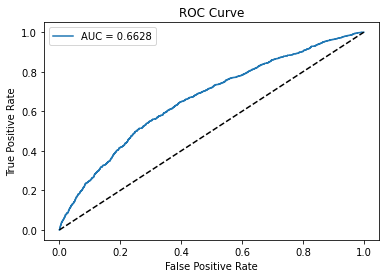

In [491]:
plt.plot(fpr,tpr, label='AUC = %0.4f'%auc_test_lr_WOE)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

## Decile Plots and KS statistic

In [476]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('SPREAD',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['SPREAD'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))

In [477]:
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

In [493]:
scores_train = scoring(features_train,clf,label_train)
scores_test = scoring(features_test,clf,label_test)

In [495]:
scores_train.to_excel('score_train.xlsx')
scores_test.to_excel('score_test.xlsx')

In [479]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,5405,1069,4336,19.777983,1069,4336,24.716763,8.719960,15.996803
2.0,5405,682,4723,12.617946,1751,9059,40.485549,18.218200,22.267349
3.0,5405,561,4844,10.379278,2312,13903,53.456647,27.959779,25.496869
4.0,5405,432,4973,7.992599,2744,18876,63.445087,37.960784,25.484302
5.0,5405,407,4998,7.530065,3151,23874,72.855491,48.012066,24.843425
6.0,5405,344,5061,6.364477,3495,28935,80.809249,58.190045,22.619203
7.0,5405,283,5122,5.235893,3778,34057,87.352601,68.490699,18.861902
8.0,5405,236,5169,4.366327,4014,39226,92.809249,78.885872,13.923376


In [480]:
deciling(scores_test,['DECILE'],'TARGET','NONTARGET')

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,1301,250,1051,19.215988,250,1051,23.629490,8.794979,14.834511
2.0,1301,164,1137,12.605688,414,2188,39.130435,18.309623,20.820811
3.0,1301,145,1156,11.145273,559,3344,52.835539,27.983264,24.852275
4.0,1300,104,1196,8.000000,663,4540,62.665406,37.991632,24.673775
5.0,1301,86,1215,6.610300,749,5755,70.793951,48.158996,22.634955
6.0,1301,72,1229,5.534204,821,6984,77.599244,58.443515,19.155729
7.0,1300,75,1225,5.769231,896,8209,84.688091,68.694561,15.993530
8.0,1301,56,1245,4.304381,952,9454,89.981096,79.112971,10.868126


## Lift chart, Actual vs predicted and Gains chart

In [481]:
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

In [482]:
def gains(data,decile_by,target,score):
    inputs = list(decile_by)
    inputs.extend((target,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[target]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']
    plots(agg1,target,'Distribution')

In [486]:
lift_train = pd.concat([features_train,scores_train],axis=1)
lift_test = pd.concat([features_test,scores_test],axis=1)

In [484]:
features_train = df_train_new.drop('TARGET',axis=1)
label_train = df_train_new['TARGET']
features_test = df_test_new.drop('TARGET',axis=1)
label_test = df_test_new['TARGET']

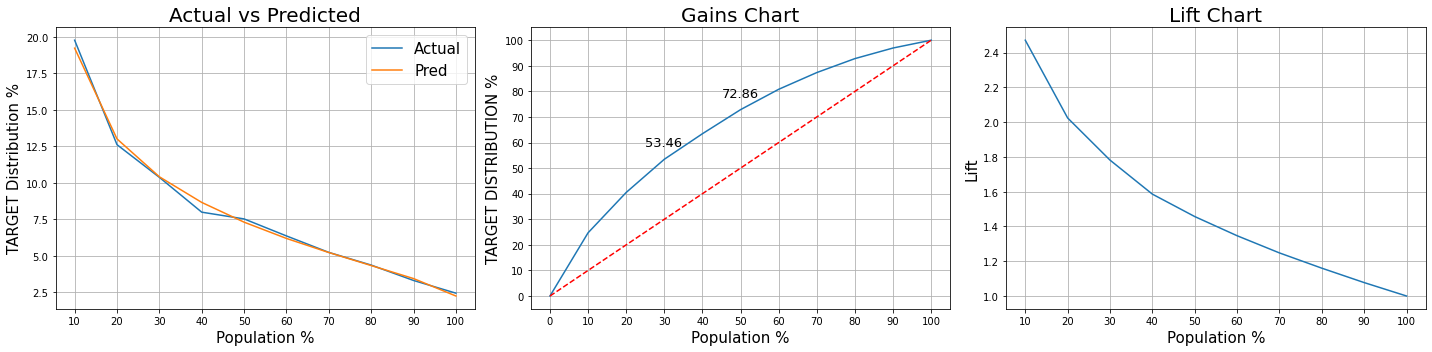

In [487]:
gains(lift_train,['DECILE'],'TARGET','SCORE')

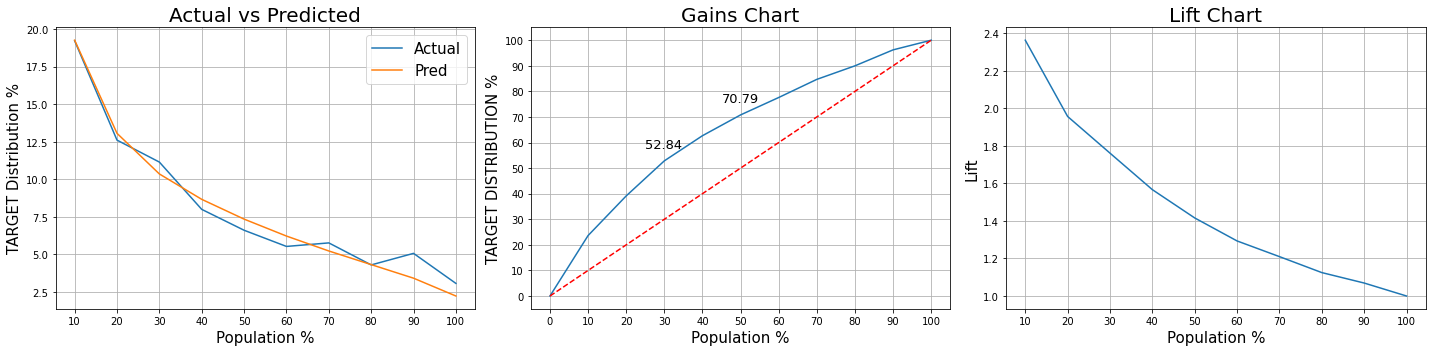

In [488]:
gains(lift_test,['DECILE'],'TARGET','SCORE')

## Feature Important

In [553]:
df = pd.read_csv('train_transform.csv')
df = df.drop('Unnamed: 0',axis=1)
organize_type= final_iv[final_iv['VAR_NAME']=='ORGANIZATION_TYPE'].sort_values(['EVENT_RATE'])
organize_type.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
array= np.array(organize_type['EVENT_RATE'])
bins=[0.04,0.05,0.06,0.07,0.08,0.09,0.09,0.10,0.12,0.21]
bin_indices  = np.digitize(array, bins)
bin_indices = list(bin_indices)
organize_type['bins']= bin_indices
organize_type['bins'].unique()
organize_type['bins'] = organize_type['bins'].replace({0:'CAT_0',1:'CAT_1',2:'CAT_2',3:'CAT_3',
                                                      4:'CAT_4',5:'CAT_5',6:'CAT_6',7:'CAT_7',
                                                      8:'CAT_8',9:'CAT_9',10:'CAT_10'})
organize_type['ORGANIZATION_TYPE']=organize_type['MIN_VALUE']
df = df.merge(organize_type[['ORGANIZATION_TYPE','bins']],how='left',on='ORGANIZATION_TYPE')
df = df.drop(['ORGANIZATION_TYPE'],axis=1)
df['bins'].unique()

array(['CAT_7', 'CAT_5', 'CAT_1', 'CAT_8', 'CAT_4', 'CAT_9', 'CAT_3',
       'CAT_2', 'CAT_10', 'CAT_0'], dtype=object)

In [546]:
IV.sort_values('IV',ascending=False)[:3]

,VAR_NAME,IV
0,AGE,0.111468
26,bins,0.094374
14,INCOME_TYPE,0.071932


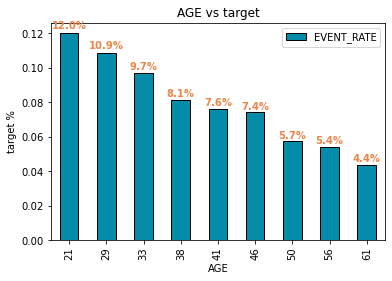

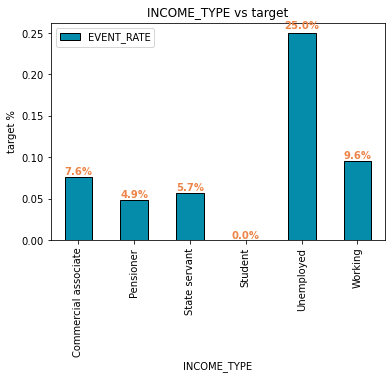

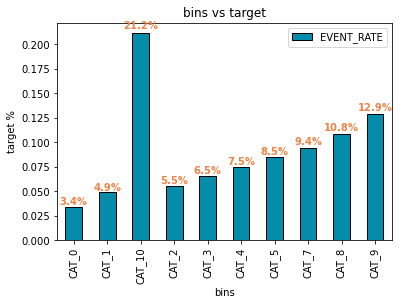

In [554]:
bar_color = '#058caa'
num_color = '#ed8549'

final_iv,_ = data_vars(df[['AGE','INCOME_TYPE','bins']],df['TARGET'])
final_iv = final_iv[(final_iv.VAR_NAME != 'target')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('target'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('target') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

In [576]:
df_score = pd.read_csv('Scoring.csv')

# Summary

<AxesSubplot:ylabel='TARGET'>

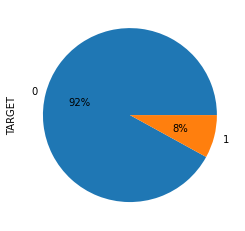

In [580]:
df_train_new['TARGET'].value_counts().plot(kind='pie',autopct='%1.0f%%')

 a credit lending company has a number of creditors who defaulted as much as 4969 or 8% of the total creditors. The total loss incurred by the company as a result of the loan was $2,704,876,771. As Data scientist, I have task to mitigate the default creditors. Machine learning can predict a target with train dataset. By that ability, I created model to predict score applicants from their repayment capability.

Train dataset have 54050 credit applicant.  before that, train dataset have filtered with approved. Test dataset set have 13008 credit applicant. 

Loan model with logistic regression algorithm has 66% AUC, 91.8% accuracy and no overfitting indication. Model can predict score of applicant based on their repayment capability. Applicant separated split a decile based on their score.

In [579]:
df_score[['Decile','MAX SCORE','MIN SCORE']]

,Decile,MAX SCORE,MIN SCORE
0,1,0.250844,0.142746
1,2,0.142742,0.127891
2,3,0.127889,0.117762
3,4,0.117762,0.109377
4,5,0.109376,0.101725
5,6,0.101723,0.094048
6,7,0.094044,0.085667
7,8,0.085663,0.076424
8,9,0.076424,0.067371
9,10,0.067369,0.030345


Applicant with Decile 1-4 high risk default probability. I recommended to rejected applicant with decile 1. Decile 2-4 can bring them with high interest rate. Decile 5-7 have medium risk category. We can bring medium interest rate to them. Decile 8-10 have low risk category. We can bring low interest rate and higher credit limit

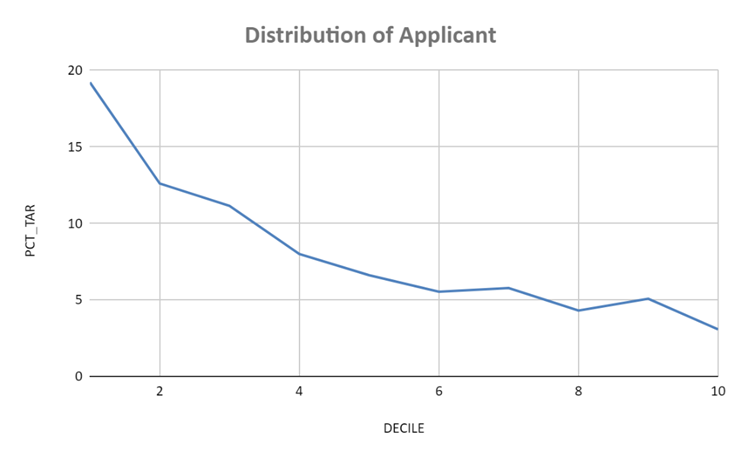

Based on distribution applicant from test dataset, 40% of applicant have high risk probability. Financial institutions must selective to approved credit applicant. Given approprite interest rate or credit limit can help financial Financial institutions to migate loss.